**Projet de DeepLearning : Machine learning et Deep Learning sur les données de spam**

Dans ce TP, nous allons implémenter différents algorithmes pour **détecter si un message est un spam** ou pas en ayant recours aux librairies de Scikit-learn et à Keras. Le dataset considéré ici est un dataset très simple, celui du spam. L'objectif est de prédire les messages qui sont malveillants, à partir de plusieurs variables qui sont la fréquence d'un certain nombre de mots ou encore la présence et la longueur de caractères majuscules, etc. Il s'agit donc d'une classification binaire (si message est un spam '1' ou non '0').


Dans un premier temps, nous nous proposons de faire une **étude exploratoire** pour se familiariser avec la donnée et comprendre comment les variables se comportent. Cette étape permettra également de débusquer d'eventuelles anomalies et de nettoyer la donnée si nécessaire. Puis nous nous attarderons à l'explicabilité des données.

Finalement, nous entrainerons des modèles de Machine Learning (**Random Forest, Regression Logistique, Gradient Boosting**) et de Deep Learning (**DNN**) sur des données d'entrainement et nous prédirons sur des données de test afin d'évaluer les performances des modèles.

# Installation Packages

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
import numpy as np # Pour les calculs mathématiques
import matplotlib.pyplot as plt # Pour les graphiques
import pandas as pd # Pour la manipulation de tableaux de données
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split



from tensorflow import keras # Pour le deep learning

# SPAM DATABASE

## Analyse exploratoire et explicabilité de la donnée

 Nous commençons par importer notre datset pour l'analyse exploratoire

In [9]:
data_spam = pd.read_csv ("/content/drive/MyDrive/Colab Notebooks/DeepLearning/Data/spam.csv")
print(data_spam.shape)
data_spam.head(10)

(4601, 58)


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_semicolon,char_freq_leftbrac,char_freq_leftsquarebrac,char_freq_exclaim,char_freq_dollar,char_freq_pound,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
6,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.00,0.054,0.0,0.164,0.054,0.000,1.671,4,112,1
7,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,...,0.00,0.206,0.0,0.000,0.000,0.000,2.450,11,49,1
8,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,...,0.00,0.271,0.0,0.181,0.203,0.022,9.744,445,1257,1
9,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,...,0.04,0.030,0.0,0.244,0.081,0.000,1.729,43,749,1


Notre dataset est composé de 4601 lignes. Les variables explicatives sont au nombre de 57 et sont majoritairement la fréquence d'occurence de mots ou de caractères donnés dans les mails. Mais nous remarquons aussi à la fin des variables relatives à la présence de majuscules dans les mails. Enfin quant à la variable cible, elle renseigne si le mail est un spam ('1') ou non ('0').

In [ ]:
data_spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

A l'exception de trois variables qui elles sont des entiers relatifs, toutes les variables sont des nombres décimaux.

On observe qu'il n'y a pas de valeurs manquantes à traiter.  
Par ailleurs, il y a 3 formats de données:
- int64: nombres entiers relatifs
- float64: nombres décimaux
- bool : variable booléenne (vaut 0 ou 1). Elle n'est pas spécifiquement marquée. Mais la variable cible "spam" peut être traitée comme tel.

In [ ]:
# Combien de valeurs uniques possède chaque colonne ?
data_spam.nunique().sort_values()

spam                             2
word_freq_table                 38
word_freq_3d                    43
word_freq_parts                 53
word_freq_font                  99
word_freq_conference           106
word_freq_857                  106
word_freq_cs                   108
word_freq_415                  110
word_freq_receive              113
word_freq_addresses            118
word_freq_direct               125
word_freq_telnet               128
word_freq_report               133
word_freq_original             136
word_freq_over                 141
word_freq_make                 142
word_freq_money                143
word_freq_order                144
word_freq_credit               148
word_freq_lab                  156
word_freq_people               158
word_freq_technology           159
word_freq_project              160
word_freq_pm                   163
word_freq_000                  164
word_freq_internet             170
word_freq_address              171
word_freq_remove    

Rien ne peut spécifiquement être conclu ici qui n'ait précédemment été dit. Nous nous assurerons quand même que les variables qui ont la même cardinalité ne sont pas les mêmes. Leurs noms nous disent qu'à priori non.

In [ ]:
data_spam['word_freq_conference'].equals(data_spam['word_freq_857'])

False

In [ ]:
data_spam['word_freq_will'].equals(data_spam['char_freq_pound'])

False


*   Les colonnes ne sont pas les mêmes. Et elles seront toutes conservées dans notre dataset.

*   Effectuons une analyse descriptive des variables qualitatives ou catégorielles. Ici, seule la variable cible est considérée qualitatives



In [5]:
#Comptons le nombre de fois où chaque catégorie apparait.
data_spam['spam'].value_counts()

0    2788
1    1813
Name: spam, dtype: int64

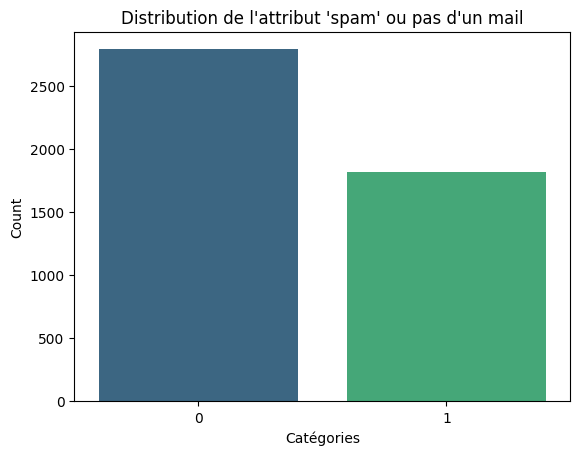

In [ ]:
# Créer un diagramme en barres pour visualiser la distribution de la variable catégorielle
sns.countplot(x='spam', data=data_spam, palette='viridis')

# Ajouter des étiquettes
plt.title("Distribution de l'attribut 'spam' ou pas d'un mail")
plt.xlabel('Catégories')
plt.ylabel('Count')

# Afficher le graphique
plt.show()

*   On remarque qu'il y a 2788 exemples de la classe "0" contre 1813 de la classe "1". Notre base de données n'est pas réellement équilibrée et contient donc plus d'exemple de mail qui ne sont pas des spams que de mails qui en sont. La classe "0" est majoritaire même si cela n'est pas excessif.

*   Ce déséquilibre des classes dans la base de données peut avoir un impact sur l'entraînement d'un modèle de machine learning. En effet, on peut rencontrer un souci de généralisation. Et cela peut éventuellement expliqué plus tard les performances de nos modèles.



*   Passons à présent à une brève description des **variables quantitatives**



In [ ]:
#Nous commençons à créer une liste des variables numériques. Il s'agit de toutes les colonnes à l'exception de la colonne "spam"
categorique = ['spam']
columns_to_exclude = categorique
numerique = data_spam.columns.difference(columns_to_exclude)
"""print(categorique)
print('------------------------------------------------')
print(numerique)"""

"print(categorique)\nprint('------------------------------------------------')\nprint(numerique)"

In [ ]:
len(numerique)

57

In [ ]:
data_spam[numerique].describe()

,capital_run_length_average,capital_run_length_longest,capital_run_length_total,char_freq_dollar,char_freq_exclaim,char_freq_leftbrac,char_freq_leftsquarebrac,char_freq_pound,char_freq_semicolon,word_freq_000,...,word_freq_re,word_freq_receive,word_freq_remove,word_freq_report,word_freq_table,word_freq_technology,word_freq_telnet,word_freq_will,word_freq_you,word_freq_your
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,5.191515,52.172789,283.289285,0.075811,0.269071,0.139030,0.016976,0.044238,0.038575,0.101645,...,0.301224,0.059824,0.114208,0.058626,0.005444,0.097477,0.064753,0.541702,1.662100,0.809761
std,31.729449,194.891310,606.347851,0.245882,0.815672,0.270355,0.109394,0.429342,0.243471,0.350286,...,1.011687,0.201545,0.391441,0.335184,0.076274,0.402623,0.403393,0.861698,1.775481,1.200810
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.588000,6.000000,35.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2.276000,15.000000,95.000000,0.000000,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,1.310000,0.220000
75%,3.706000,43.000000,266.000000,0.052000,0.315000,0.188000,0.000000,0.000000,0.000000,0.000000,...,0.110000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.800000,2.640000,1.270000
max,1102.500000,9989.000000,15841.000000,6.003000,32.478000,9.752000,4.081000,19.829000,4.385000,5.450000,...,21.420000,2.610000,7.270000,10.000000,2.170000,7.690000,12.500000,9.670000,18.750000,11.110000


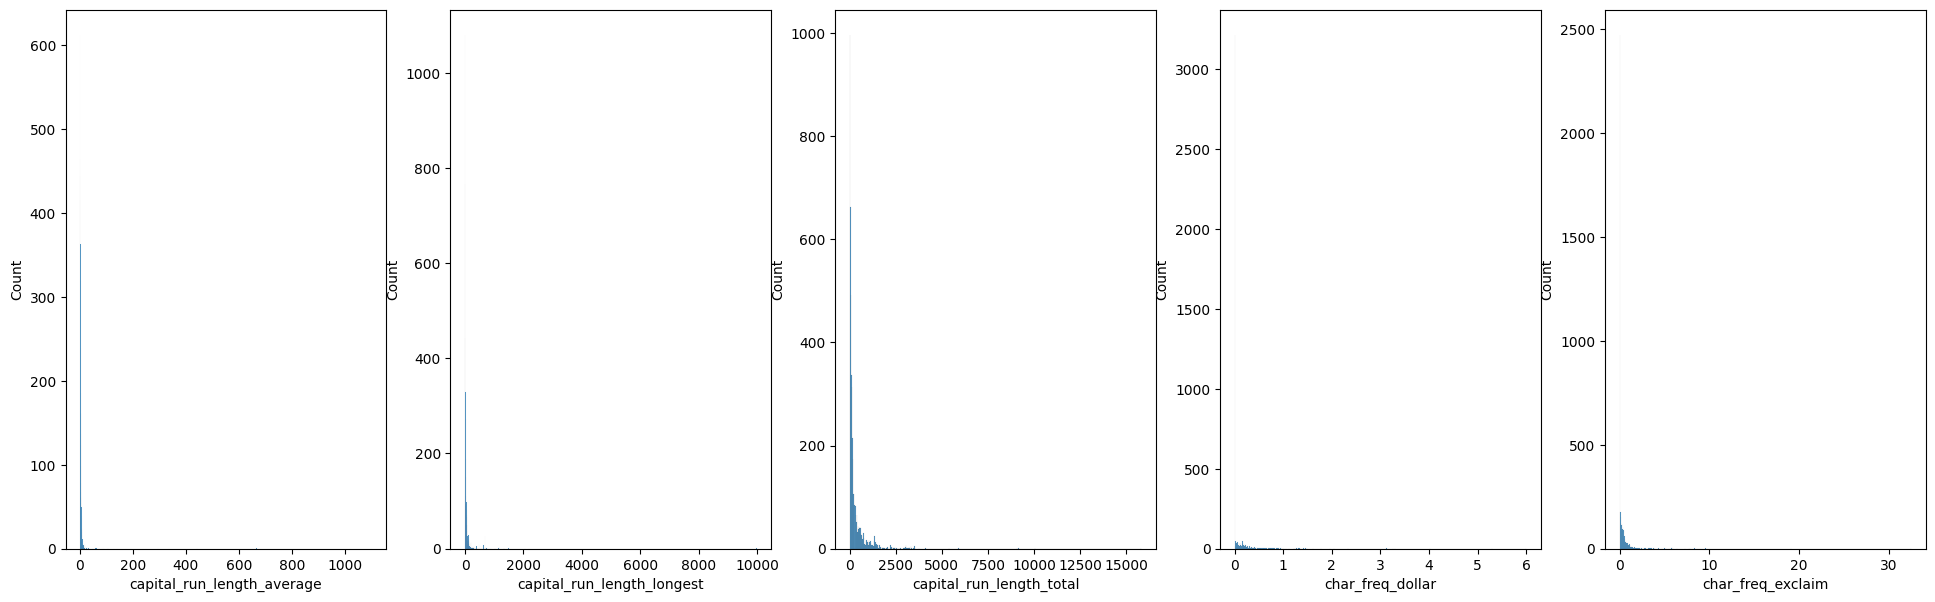

--------------------------------------------------------------------------------------------------------------------------------------------------------


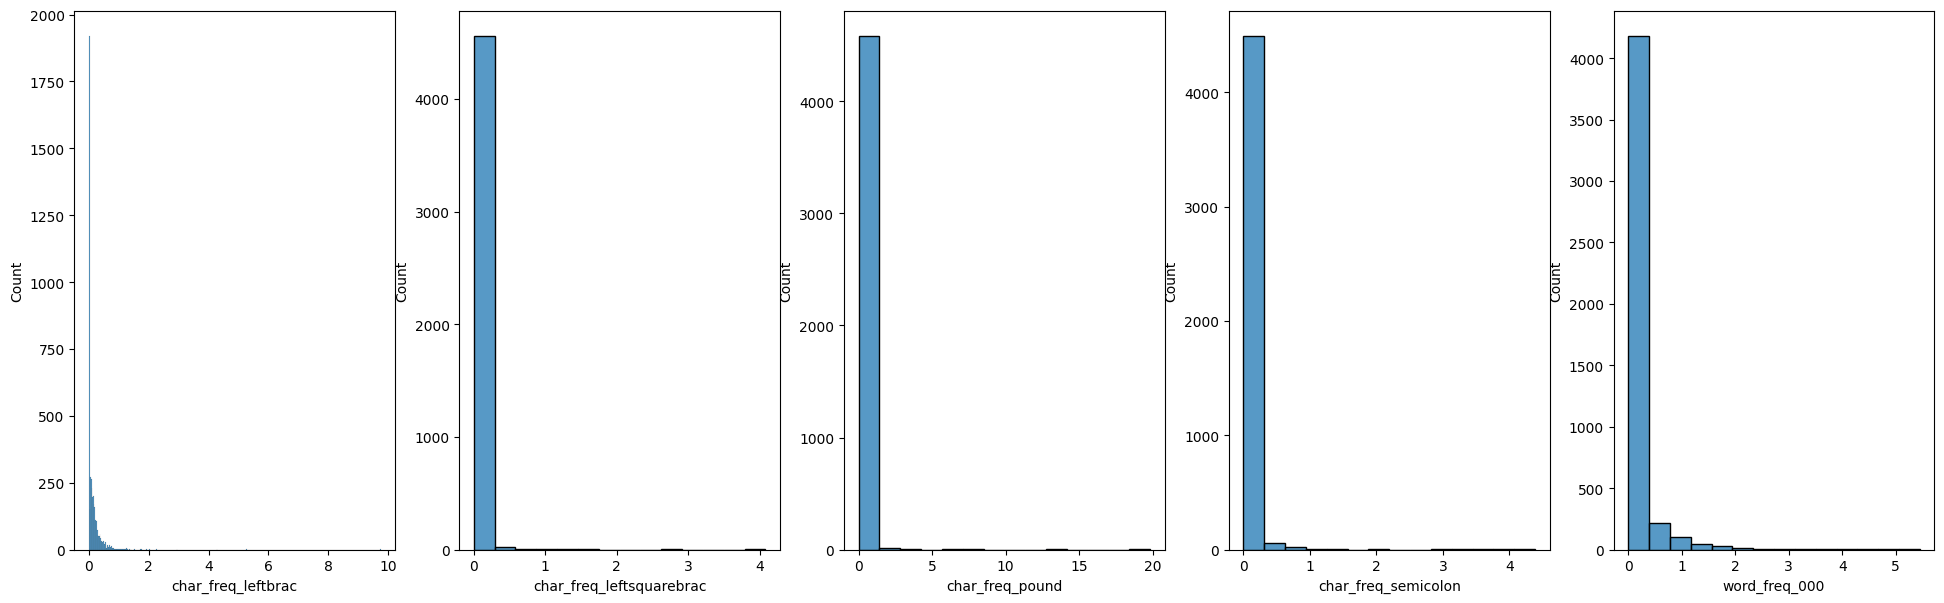

--------------------------------------------------------------------------------------------------------------------------------------------------------


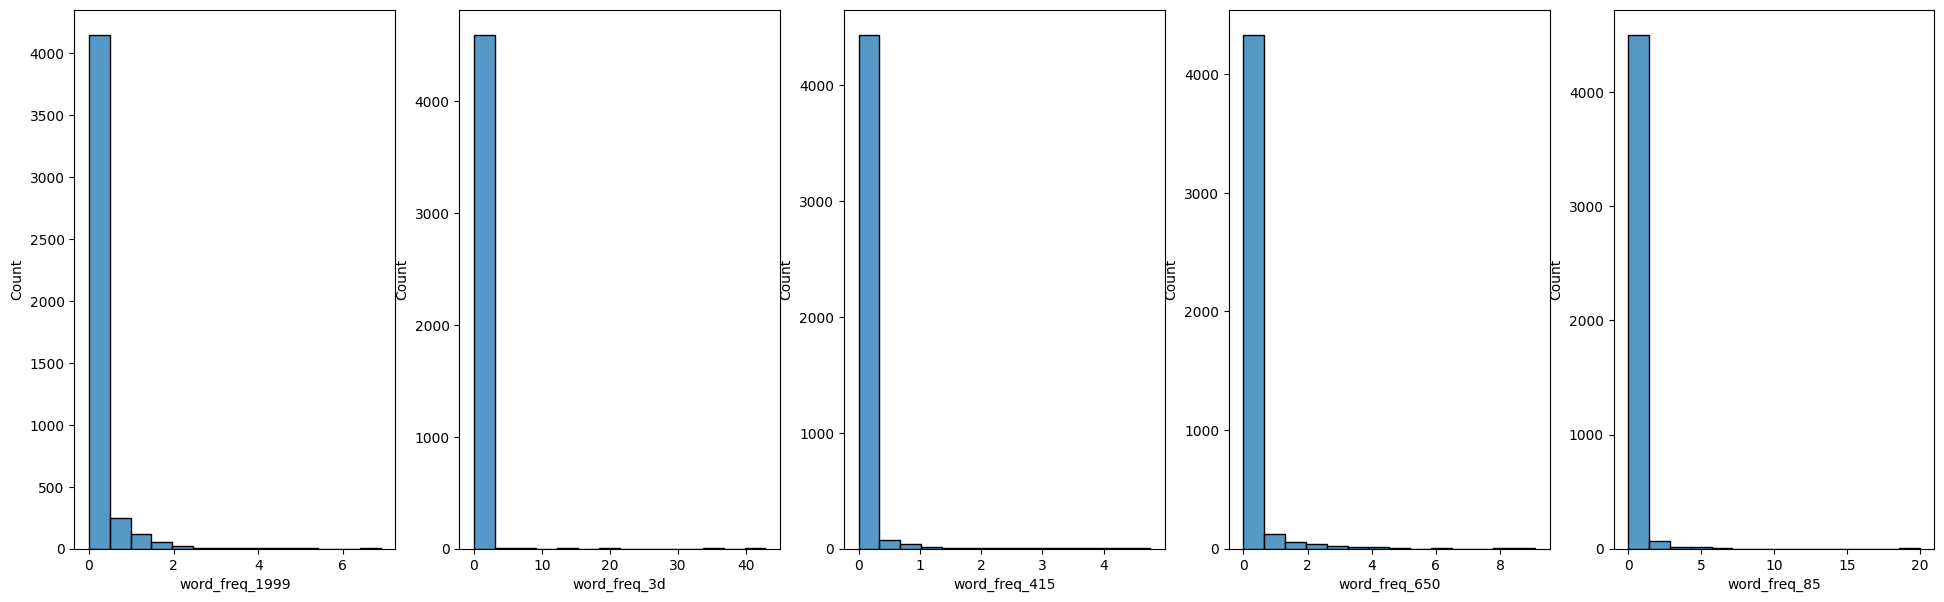

--------------------------------------------------------------------------------------------------------------------------------------------------------


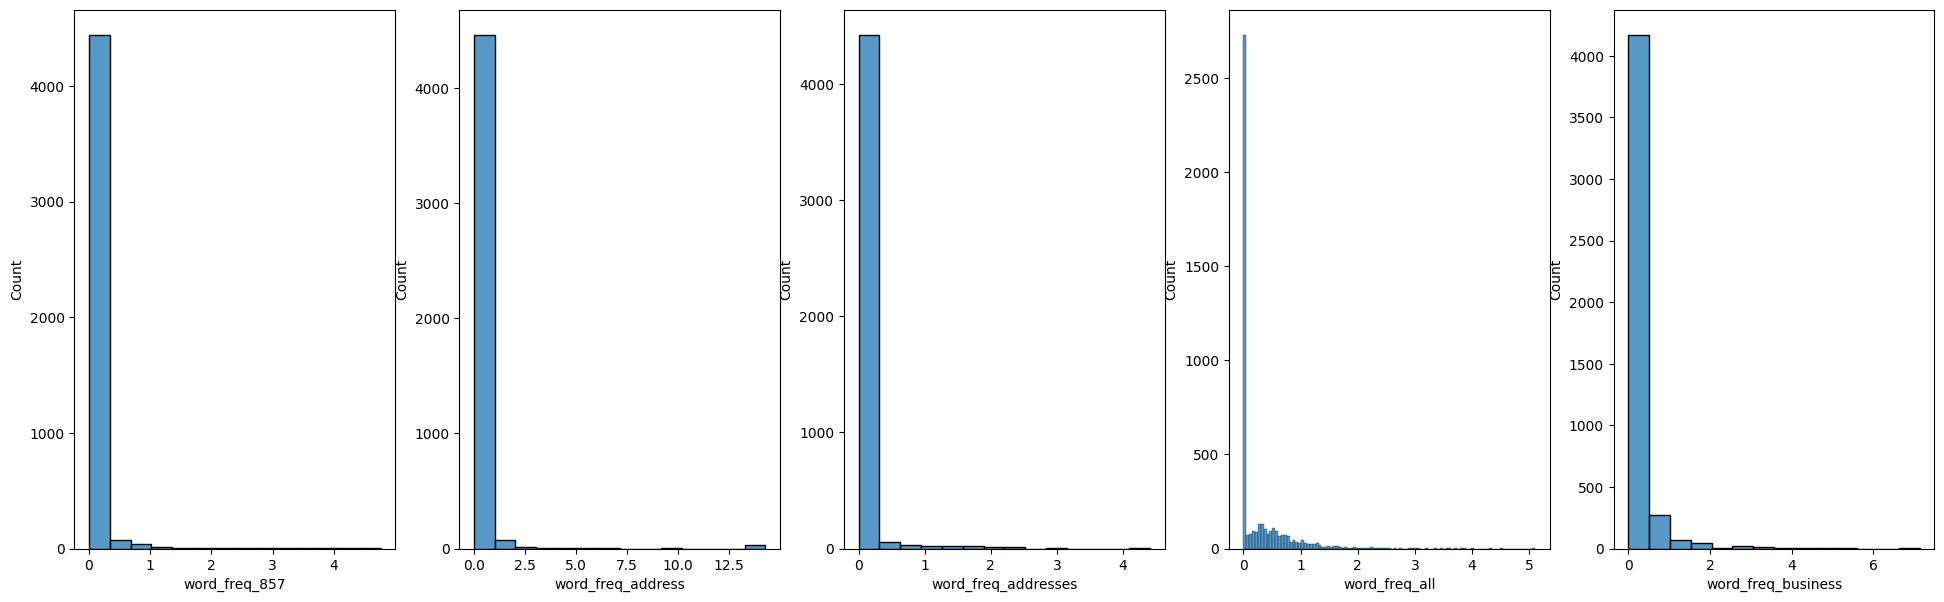

--------------------------------------------------------------------------------------------------------------------------------------------------------


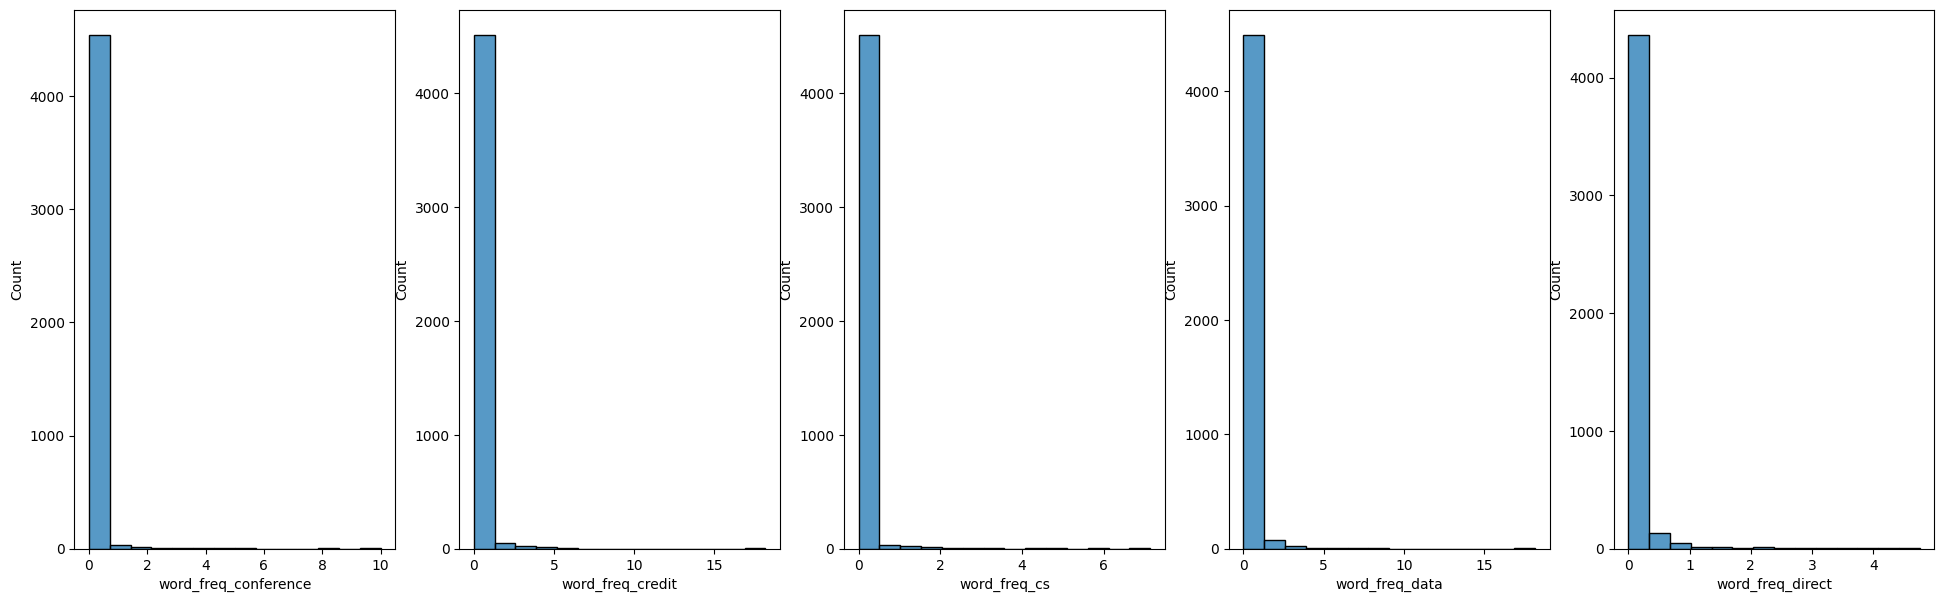

--------------------------------------------------------------------------------------------------------------------------------------------------------


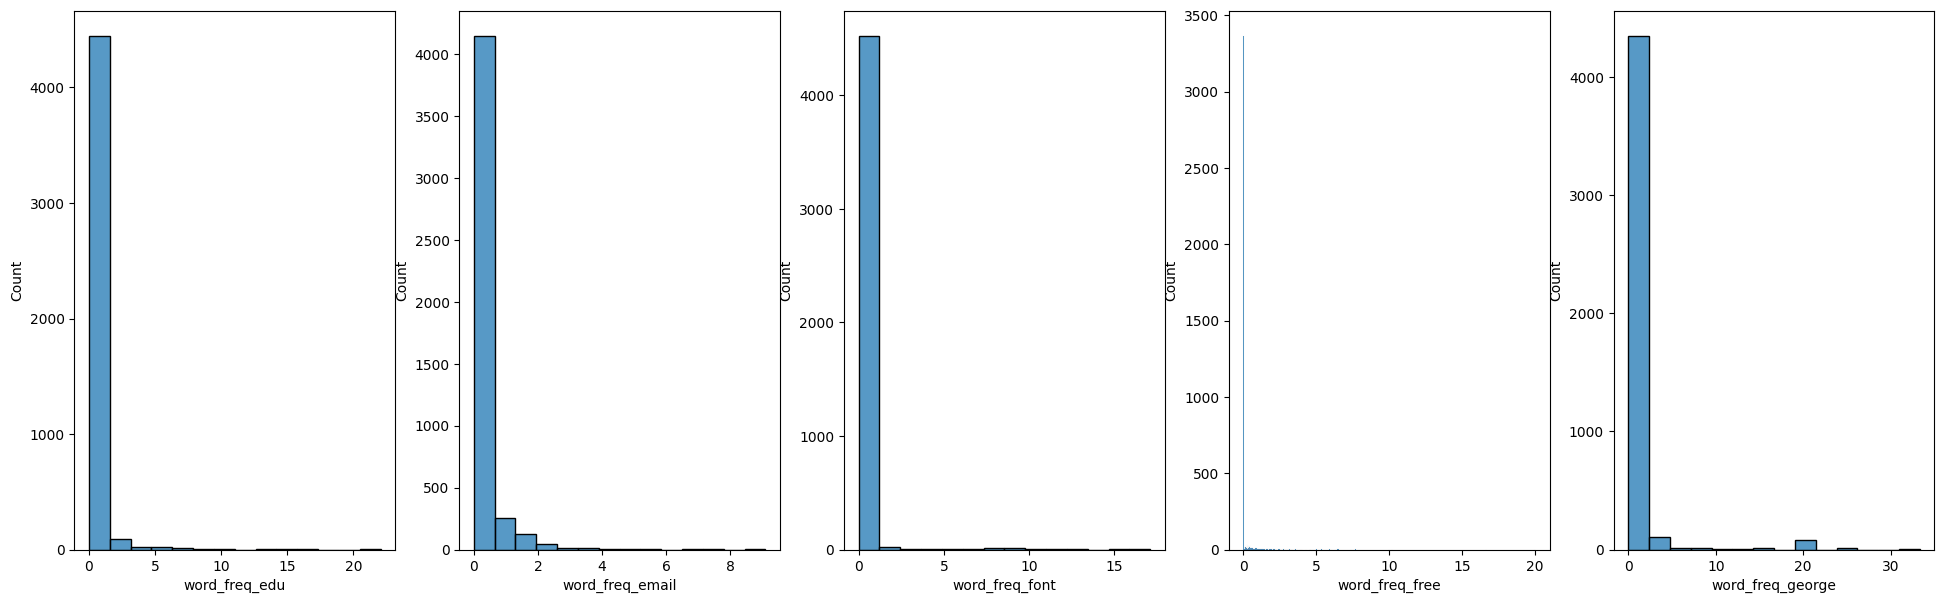

--------------------------------------------------------------------------------------------------------------------------------------------------------


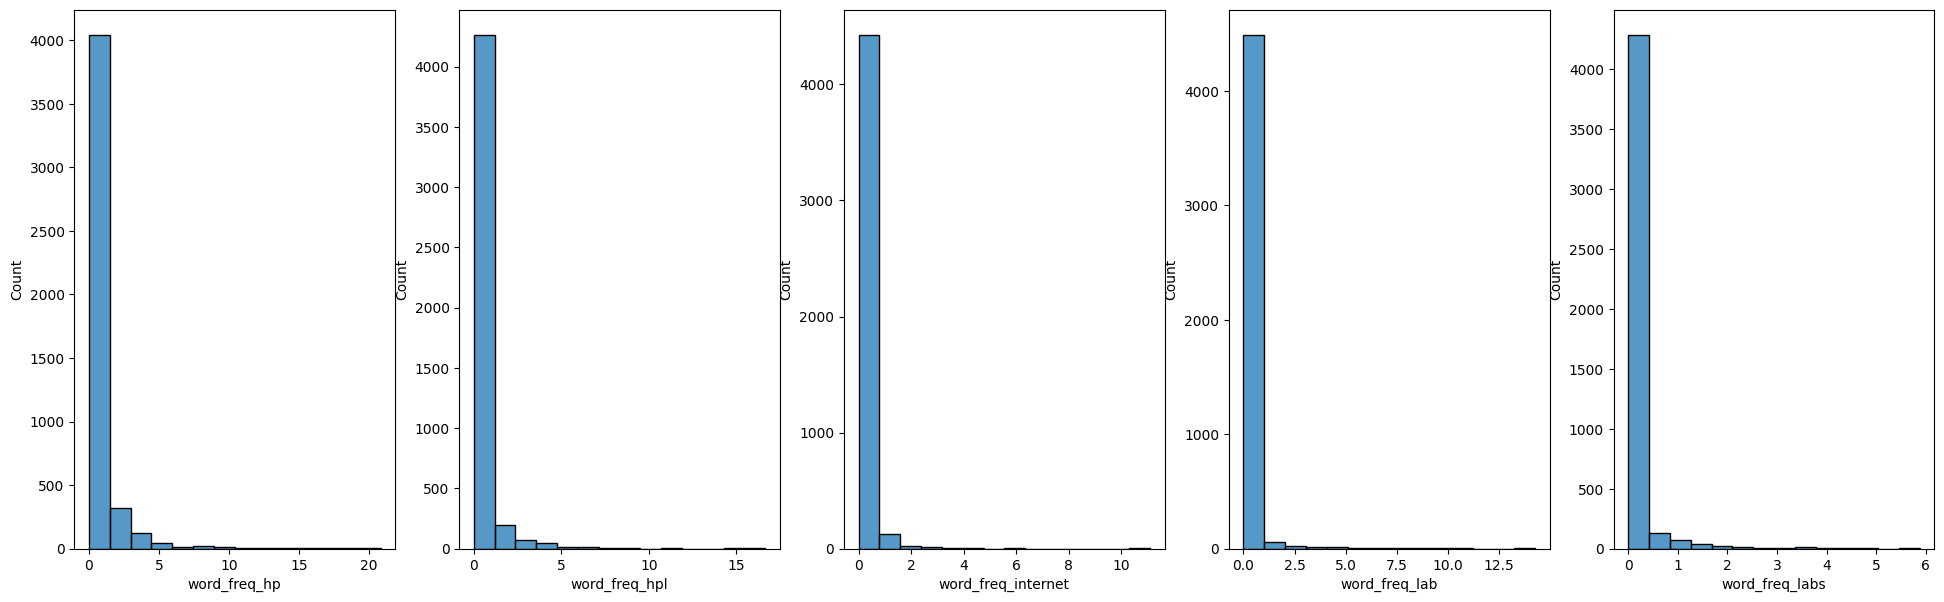

--------------------------------------------------------------------------------------------------------------------------------------------------------


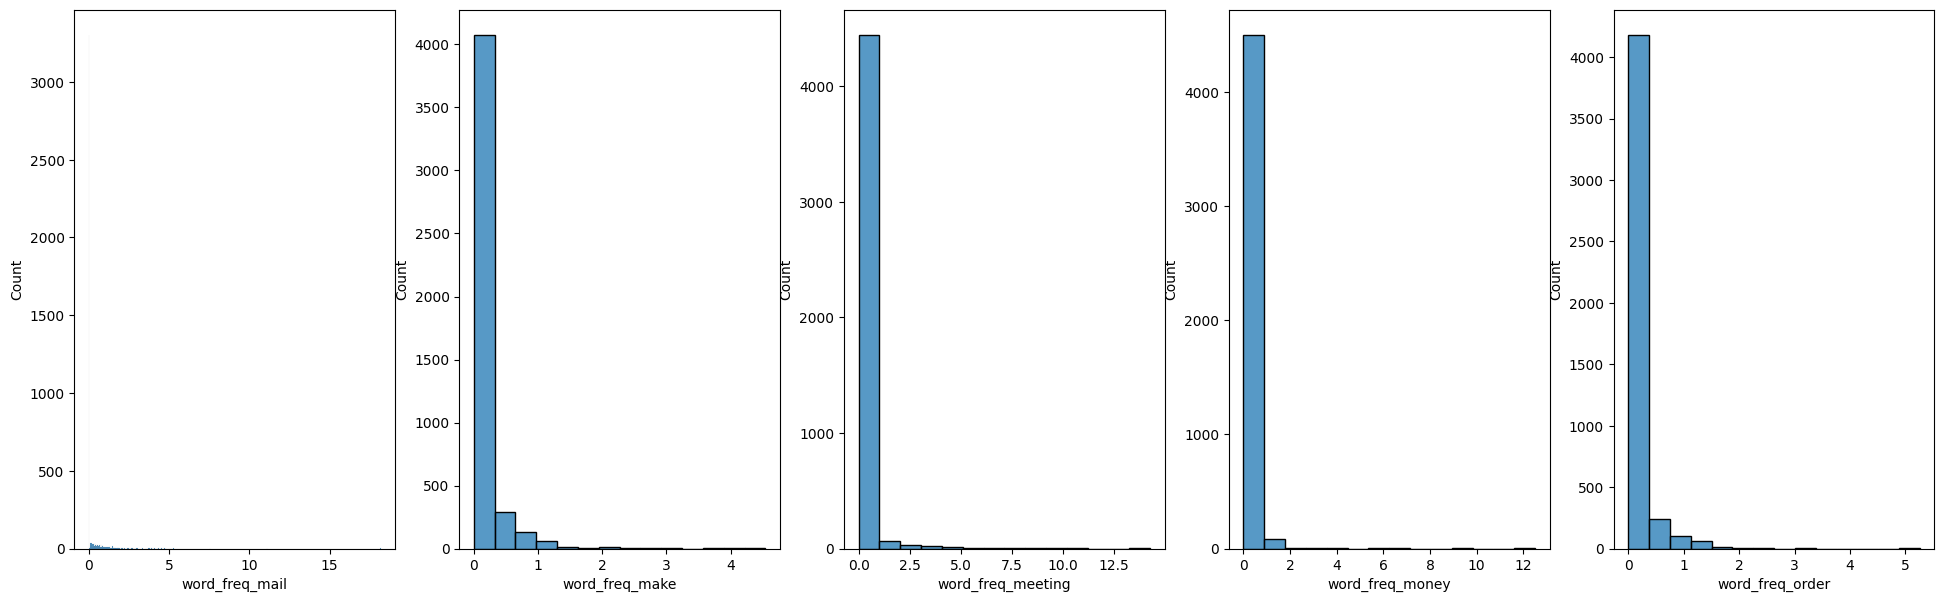

--------------------------------------------------------------------------------------------------------------------------------------------------------


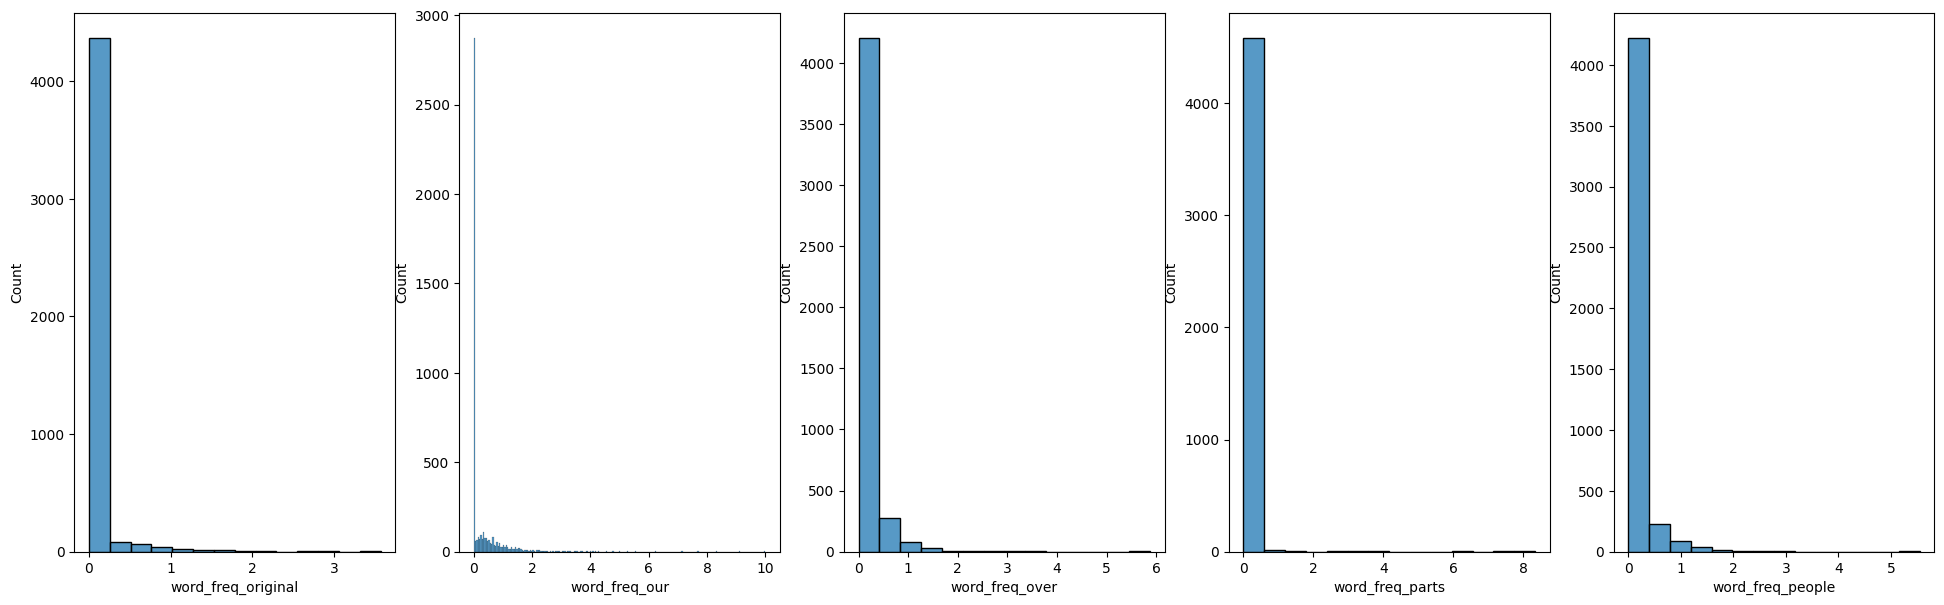

--------------------------------------------------------------------------------------------------------------------------------------------------------


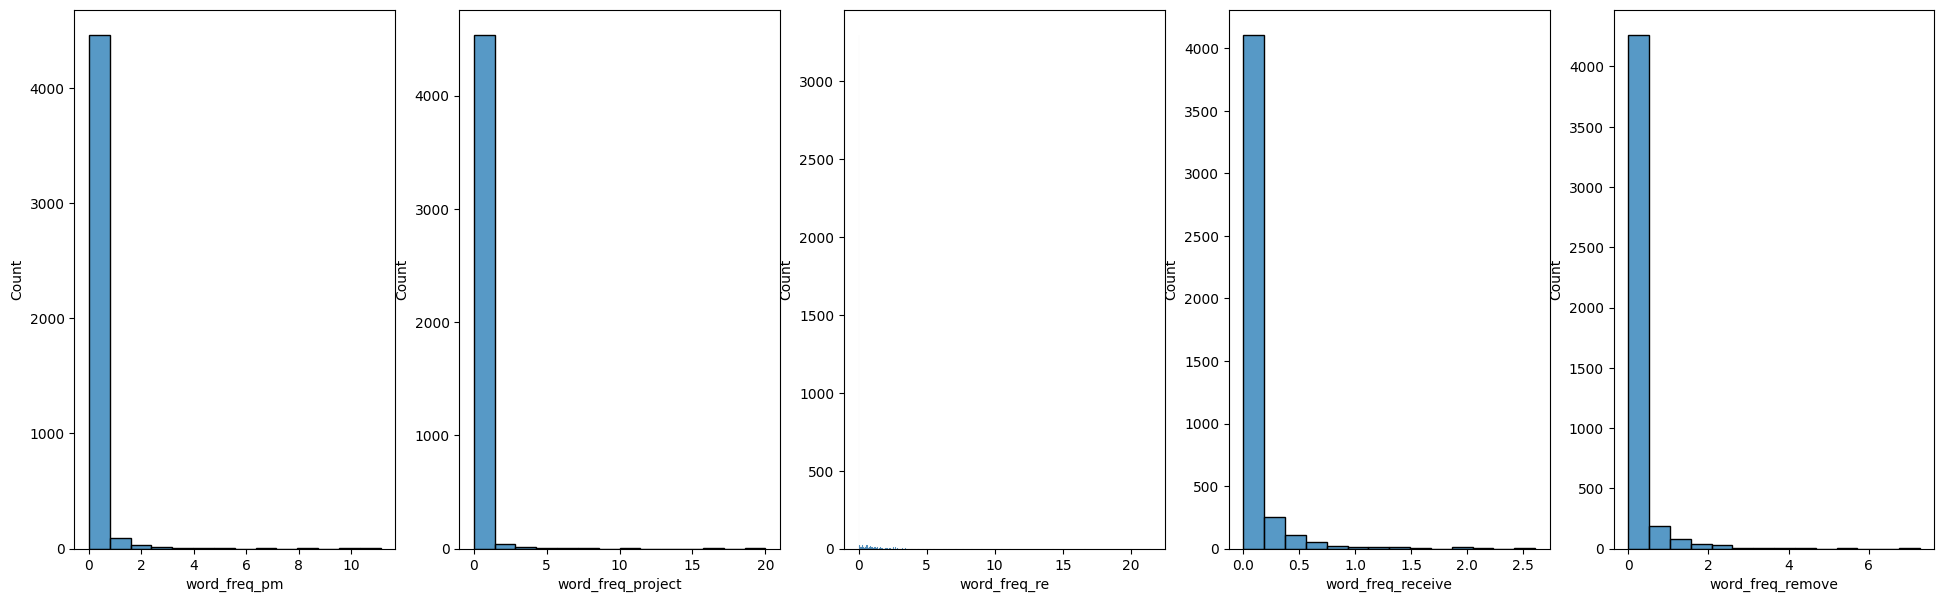

--------------------------------------------------------------------------------------------------------------------------------------------------------


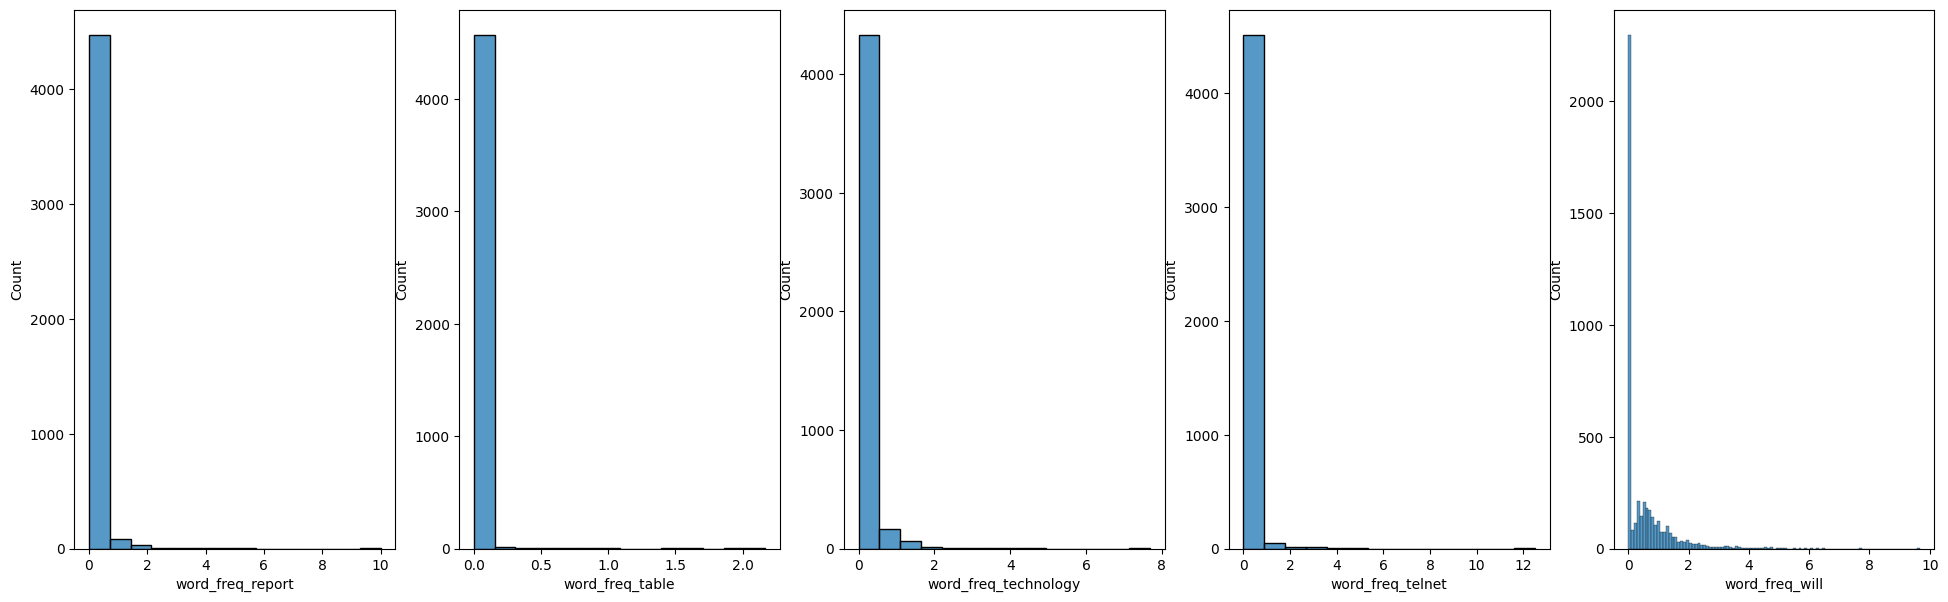

--------------------------------------------------------------------------------------------------------------------------------------------------------


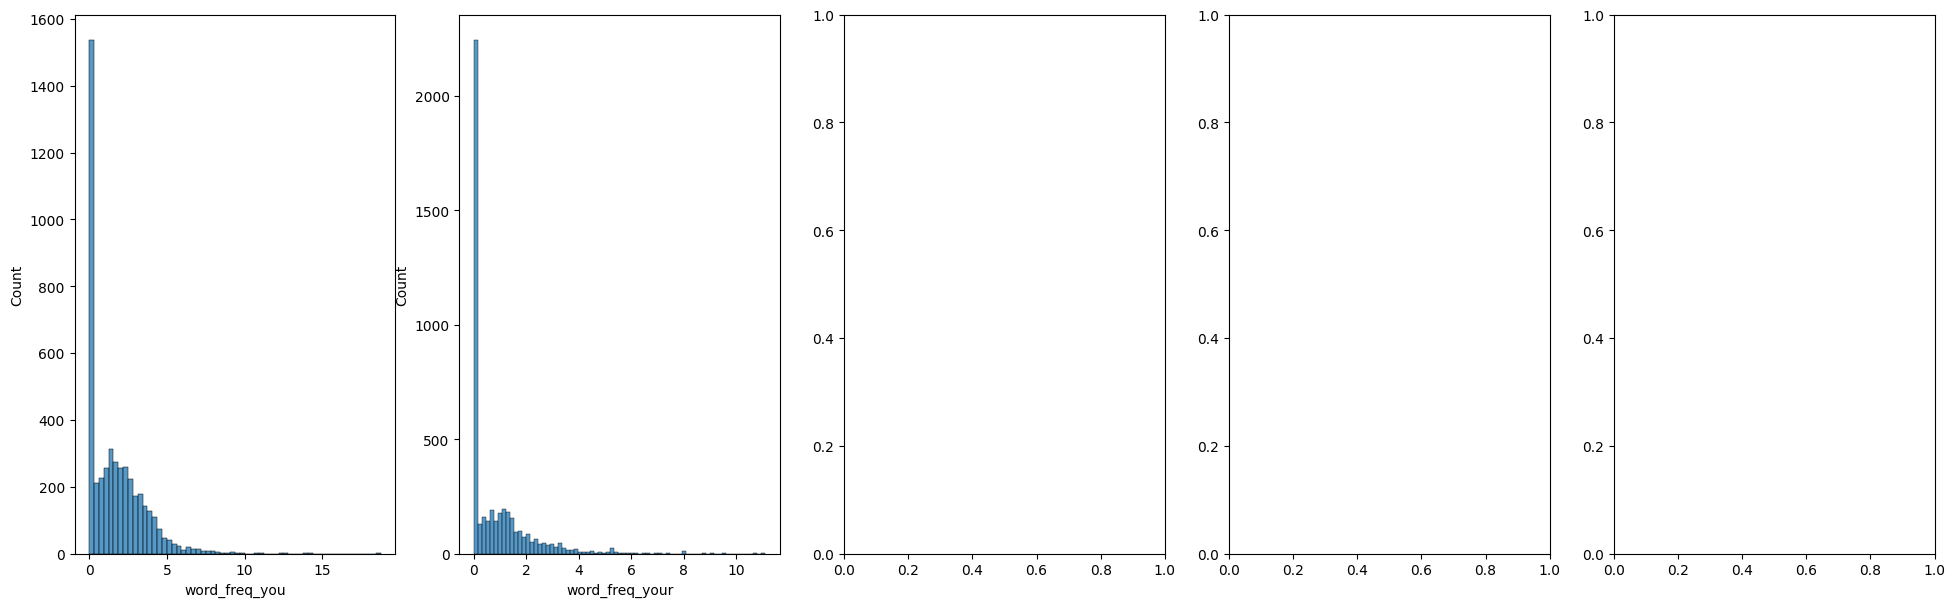

--------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
for i in range(12):
    # Calcul de l'indice de départ pour chaque itération
    indice_depart = i * 5

    # Sélection des 5 éléments consécutifs
    elements_consecutifs = numerique[indice_depart:indice_depart + 5]
    plt.rcParams["figure.figsize"]
    fig, axs = plt.subplots(1,5, figsize=(24,7))
    for i, feature in enumerate(elements_consecutifs):
      sns.histplot(data_spam[feature], ax = axs[i])
    plt.show()


    # Affichage des éléments sélectionnés
    print(f"--------------------------------------------------------------------------------------------------------------------------------------------------------")


Globalement, chaque mot ou caractère n'apparait que (par rapport au nombre total de mails) peu de fois (200 environs) dans les mails. Cela explique les pics observés au niveau de la fréquence zéro (0).

En fonction du grand nombre de variables, nous nous concentrerons sur l'explication d'une petite partie:

- "word_freq_you"
- "word_freq_business"
- "capital_run_length_total"
- "char_freq_dollar"

Ce choix est juste aléatoire et résulte de l'observation des formes les plus récurrentes.

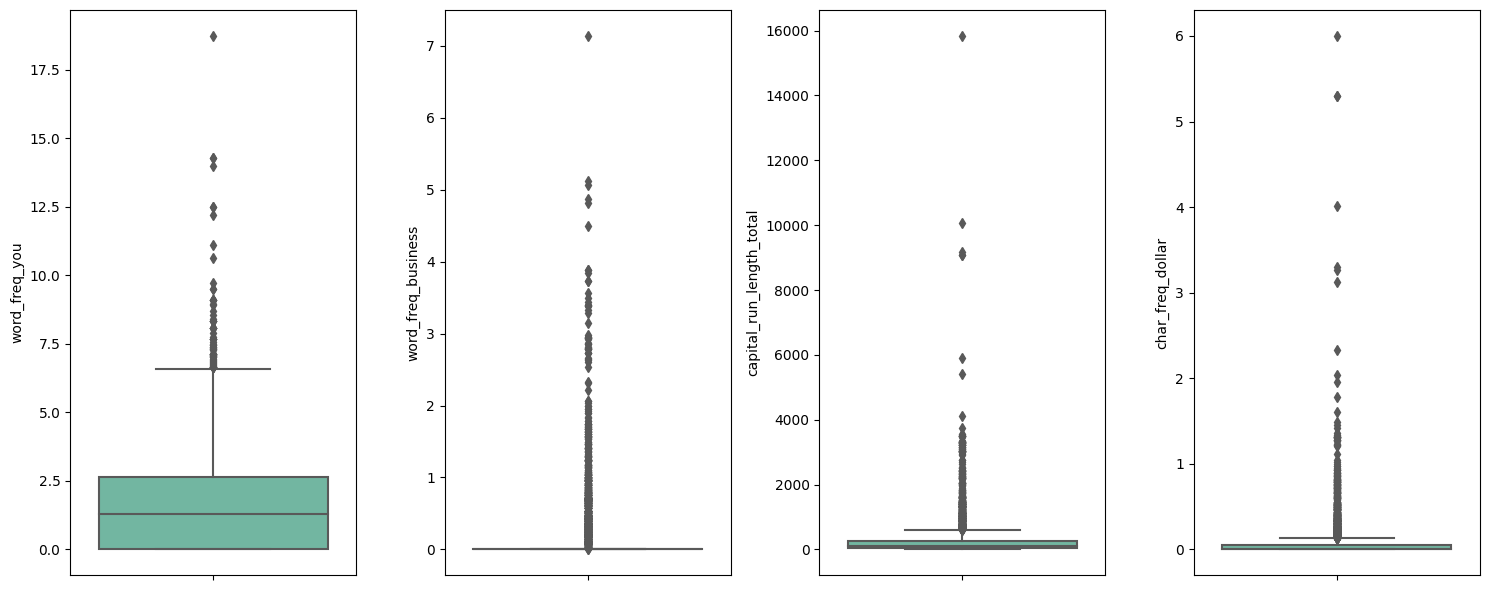

In [ ]:
variable_names = ['word_freq_you', 'word_freq_business', 'capital_run_length_total', 'char_freq_dollar']

# Créer des sous-graphiques pour chaque variable
fig, axes = plt.subplots(nrows=1, ncols=len(variable_names), figsize=(15, 6))

# Tracer les boxplots sur les sous-graphiques
for i, variable in enumerate(variable_names):
    sns.boxplot(y=variable, data=data_spam, ax=axes[i], palette='Set2')

# Ajuster l'espacement entre les sous-graphiques
plt.tight_layout()

# Afficher le graphique
plt.show()

Les variables ont toutes leur médiane vers les valeurs faibles (généralement 0). Cela explique la forme des boîtes à moustache. On note aussi un grand nombre de valeur abbérantes au dessus de la borne supérieure de la boite à moustache.

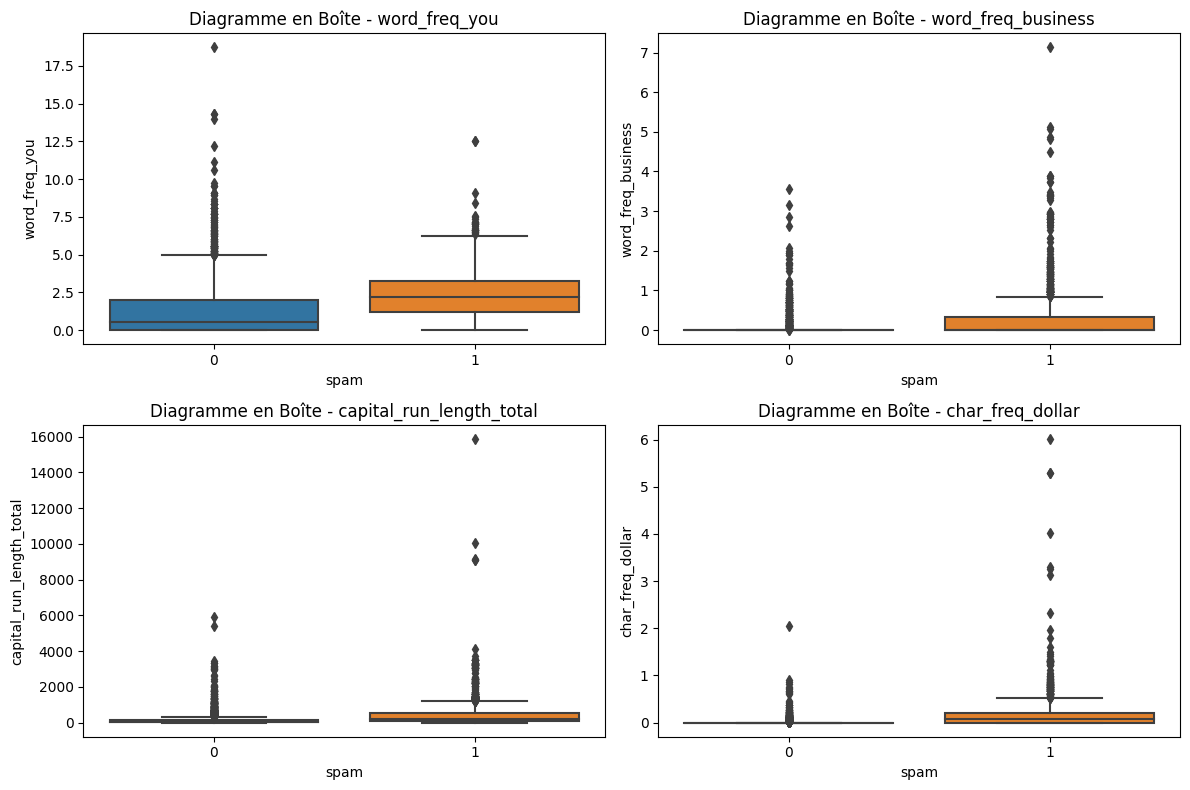

In [ ]:
# Calculer le nombre de sous-graphiques nécessaire
num_variables = len(variable_names)
num_cols = 2
num_rows = (num_variables + num_cols - 1) // num_cols
# Tracer des boxplots pour chaque variable en fonction de 'spam'
plt.figure(figsize=(12, 8))
for i, variable in enumerate(variable_names):
    plt.subplot(num_rows, num_cols, i+1)
    sns.boxplot(x='spam', y=variable, data=data_spam)
    plt.title(f'Diagramme en Boîte - {variable}')

plt.tight_layout()
plt.show()

Aucune spécificité trop flagrante n'est observée. Globalement encore une fois, on peut quand même dire que chacune de ces variables semble un tant soit peu corrélée à la variable cible vu leur présence plus marqué au niveau des mails qui sont des spams. La corrélation ne doit pas être grande vu la faible différentiation au niveau des schémas. Vérifions cela avec la matrice des corrélations

In [ ]:
data_spam[variable_names + ['spam']].corr()

,word_freq_you,word_freq_business,capital_run_length_total,char_freq_dollar,spam
word_freq_you,1.000000,0.084983,-0.007307,0.091470,0.273651
word_freq_business,0.084983,1.000000,0.064261,0.098323,0.263204
capital_run_length_total,-0.007307,0.064261,1.000000,0.201948,0.249164
char_freq_dollar,0.091470,0.098323,0.201948,1.000000,0.323629
spam,0.273651,0.263204,0.249164,0.323629,1.000000


Effectivement, chaque variable n'est que faiblement corrélée à notre variable cible. Calculons la corrélation sur l'ensemble de notre dataset à présent

In [ ]:
data_spam.corr()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_semicolon,char_freq_leftbrac,char_freq_leftsquarebrac,char_freq_exclaim,char_freq_dollar,char_freq_pound,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
word_freq_make,1.000000,-0.016759,0.065627,0.013273,0.023119,0.059674,0.007669,-0.003950,0.106263,0.041198,...,-0.026505,-0.021196,-0.033301,0.058292,0.117419,-0.008844,0.044491,0.061382,0.089165,0.126208
word_freq_address,-0.016759,1.000000,-0.033526,-0.006923,-0.023760,-0.024840,0.003918,-0.016280,-0.003826,0.032962,...,-0.007282,-0.049837,-0.018527,-0.014461,-0.009605,0.001946,0.002083,0.000271,-0.022680,-0.030224
word_freq_all,0.065627,-0.033526,1.000000,-0.020246,0.077734,0.087564,0.036677,0.012003,0.093786,0.032075,...,-0.033213,-0.016495,-0.033120,0.108140,0.087618,-0.003336,0.097398,0.107463,0.070114,0.196988
word_freq_3d,0.013273,-0.006923,-0.020246,1.000000,0.003238,-0.010014,0.019784,0.010268,-0.002454,-0.004947,...,-0.000591,-0.012370,-0.007148,-0.003138,0.010862,-0.000298,0.005260,0.022081,0.021369,0.057371
word_freq_our,0.023119,-0.023760,0.077734,0.003238,1.000000,0.054054,0.147336,0.029598,0.020823,0.034495,...,-0.032759,-0.046361,-0.026390,0.025509,0.041582,0.002016,0.052662,0.052290,0.002492,0.241920
word_freq_over,0.059674,-0.024840,0.087564,-0.010014,0.054054,1.000000,0.061163,0.079561,0.117438,0.013897,...,-0.019119,-0.008705,-0.015133,0.065043,0.105692,0.019894,-0.010278,0.090172,0.082089,0.232604
word_freq_remove,0.007669,0.003918,0.036677,0.019784,0.147336,0.061163,1.000000,0.044545,0.050786,0.056809,...,-0.033089,-0.051885,-0.027653,0.053706,0.070127,0.046612,0.041565,0.059677,-0.008344,0.332117
word_freq_internet,-0.003950,-0.016280,0.012003,0.010268,0.029598,0.079561,0.044545,1.000000,0.105302,0.083129,...,-0.027432,-0.032494,-0.019548,0.031454,0.057910,-0.008012,0.011254,0.037575,0.040252,0.206808
word_freq_order,0.106263,-0.003826,0.093786,-0.002454,0.020823,0.117438,0.050786,0.105302,1.000000,0.130624,...,-0.014646,-0.031003,0.013601,0.043639,0.149365,-0.000522,0.111308,0.189247,0.248724,0.231551
word_freq_mail,0.041198,0.032962,0.032075,-0.004947,0.034495,0.013897,0.056809,0.083129,0.130624,1.000000,...,0.011945,0.003936,0.007357,0.036737,0.075786,0.044830,0.073677,0.103308,0.087273,0.138962


In [ ]:
# Calculer la matrice de corrélation
correlation_matrix = data_spam.corr()

# Définir un seuil de corrélation (à ajuster selon vos critères)
seuil_correlation = 0.7

# Initialiser une liste pour stocker les paires de variables fortement corrélées
paires_correlees = []

# Récupérer les paires de colonnes dont la corrélation (positive ou négative) est supérieure au seuil
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > seuil_correlation:
            paire = [correlation_matrix.columns[i], correlation_matrix.columns[j]]
            paires_correlees.append(paire)

# Afficher la liste des paires de variables fortement corrélées
print(len(paires_correlees))
print(paires_correlees)


7
[['word_freq_857', 'word_freq_telnet'], ['word_freq_415', 'word_freq_telnet'], ['word_freq_415', 'word_freq_857'], ['word_freq_technology', 'word_freq_857'], ['word_freq_technology', 'word_freq_415'], ['word_freq_direct', 'word_freq_857'], ['word_freq_direct', 'word_freq_415']]


Nous avons calculé ci-dessus les variables qui sont trop fortement corrélées entre elles. A cette étape, on peut par exemple supprimer pour chaque paire de variables fortement corrélées une des 2 car elles véhiculent la même information et cela peut diminuer nos performances lors de la prédiction. Pour un seuil de 0.7, on en dénombre 7. Elles sont énumérées au niveau de la sortie ci-dessus.

Cherchons enfin les meilleures corrélations avec la variable cible.

In [ ]:
# Calculer la corrélation avec la colonne 'pluie.demain'
correlation_with_target = data_spam.corr()['spam']

# Sélectionner les variables avec une corrélation > 0.3
variables_selectionnees = correlation_with_target[abs(correlation_with_target) > 0.3]

# Trier les variables par leur coefficient de corrélation
variables_triees = variables_selectionnees.sort_values(ascending=True)

# Afficher les variables triées
print(variables_triees)

char_freq_dollar    0.323629
word_freq_remove    0.332117
word_freq_000       0.334787
word_freq_your      0.383234
spam                1.000000
Name: spam, dtype: float64


Aucune variable n'atteint le seuil de 0.5
Les variables sont faiblement corrélées avec la variable cible. Ce qui rend difficile l'explicabilité des données. 4 variables cependant ont une corrélation supérieure à 0.3 en valeur absolue avec la variable cible. Il s'agit des variables ci-dessous :

- char_freq_dollar : 0.323629
- word_freq_remove : 0.332117
- word_freq_000 : 0.334787
- word_freq_your : 0.383234
La corrélation est en valeur absolue.

Après cette longue première phase : passons au déployement des modèles de prédiction. Nous commencerons par le DNN.

## DNN_SPAM

La première étape consiste à diviser le jeu de données en données d'entrainement et de test. Mais avant cela, nous normalisons les données. 80% de ces dernières sera utilisé pour l'entrainement et 20% pour le test.

In [ ]:
# Séparez les fonctionnalités (X) de la colonne cible (y)
x = data_spam.drop('spam', axis=1)  # Toutes les colonnes sauf la colonne cible
y = data_spam['spam']

# Normalisation des données
scaler = MinMaxScaler()
x_norm = scaler.fit_transform(x)

# Utilisez train_test_split pour diviser les données
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.2, random_state=42)

print('Dimensions de x_train :', x_train.shape)
print('Dimensions de y_train :', y_train.shape)
print('Dimensions de x_test  :', x_test.shape)
print('Dimensions de y_test  :', y_test.shape)

Dimensions de x_train : (3680, 57)
Dimensions de y_train : (3680,)
Dimensions de x_test  : (921, 57)
Dimensions de y_test  : (921,)


Pour un premier usage:
- nous déploierons un DNN à 2 couches avec 100 neurones par couche.
- nous créons un modèle séquentiel
- nous convertissons les données en un vecteur unidimensionnel
- une fonction d'activation ReLU (Rectified Linear Unit) est utilisé pour introduire de la non-linéarité.
- on ajoute une régularisation en désactivant aléatoirement 20% des neurones de chaque couche pendant l'entraînement afin de prévenir le surajustement.
- la couche de sortie a 1 neurone avec une fonction d'activation sigmoïde.

Le choix des fonctions d'activation est typique de notre problème : classification binaire.

In [ ]:
num_layer1 = 100
num_layer2 = 100

model = keras.models.Sequential()

model.add(keras.layers.Input((57,1)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(num_layer1, activation='relu'))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(num_layer1, activation='relu'))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 57)                0         
                                                                 
 dense (Dense)               (None, 100)               5800      
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dropout_1 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 1)                 101       
                                                                 
Total params: 16001 (62.50 KB)
Trainable params: 16001 (

Nous définissons la fonction de perte, la métrique à suivre et enfin la l'algorithme d'optimisation.

In [ ]:
model.compile(optimizer = 'adam',
              loss      = 'binary_crossentropy',
              metrics   = ['accuracy'])

Nous chercherons à surveiller la perte sur l'ensemble de validation pendant l'entraînement du modèle. Si cette perte ne s'améliore pas pendant 20 époques consécutives, l'entraînement est arrêté et les poids du modèle sont restaurés à ceux du meilleur point.

In [ ]:
callback = keras.callbacks.EarlyStopping(monitor              = 'val_loss',
                                         mode                 ='min',
                                         patience             = 20,
                                         restore_best_weights = True)

Passons à l'entrainement du modèle. Il est effectué sur les données d'entraînement (x_train et y_train) pendant 50 époques, avec un batch size de 368, en utilisant 20% des données comme ensemble de validation.

In [ ]:
hist = model.fit(x_train,
                 y_train,
                 batch_size       = 368,
                 epochs           = 50,
                 verbose          = 1,
                 validation_split = 0.2,
                 callbacks        = [callback])

Epoch 1/50
8/8 [==============================] - 1s 36ms/step - loss: 0.6839 - accuracy: 0.6185 - val_loss: 0.6693 - val_accuracy: 0.6359
Epoch 2/50
8/8 [==============================] - 0s 11ms/step - loss: 0.6593 - accuracy: 0.6447 - val_loss: 0.6377 - val_accuracy: 0.6549
Epoch 3/50
8/8 [==============================] - 0s 11ms/step - loss: 0.6228 - accuracy: 0.6912 - val_loss: 0.5904 - val_accuracy: 0.7541
Epoch 4/50
8/8 [==============================] - 0s 11ms/step - loss: 0.5686 - accuracy: 0.7812 - val_loss: 0.5234 - val_accuracy: 0.8247
Epoch 5/50
8/8 [==============================] - 0s 10ms/step - loss: 0.4954 - accuracy: 0.8417 - val_loss: 0.4457 - val_accuracy: 0.8533
Epoch 6/50
8/8 [==============================] - 0s 11ms/step - loss: 0.4165 - accuracy: 0.8651 - val_loss: 0.3756 - val_accuracy: 0.8696
Epoch 7/50
8/8 [==============================] - 0s 12ms/step - loss: 0.3535 - accuracy: 0.8804 - val_loss: 0.3257 - val_accuracy: 0.8899
Epoch 8/50
8/8 [===========

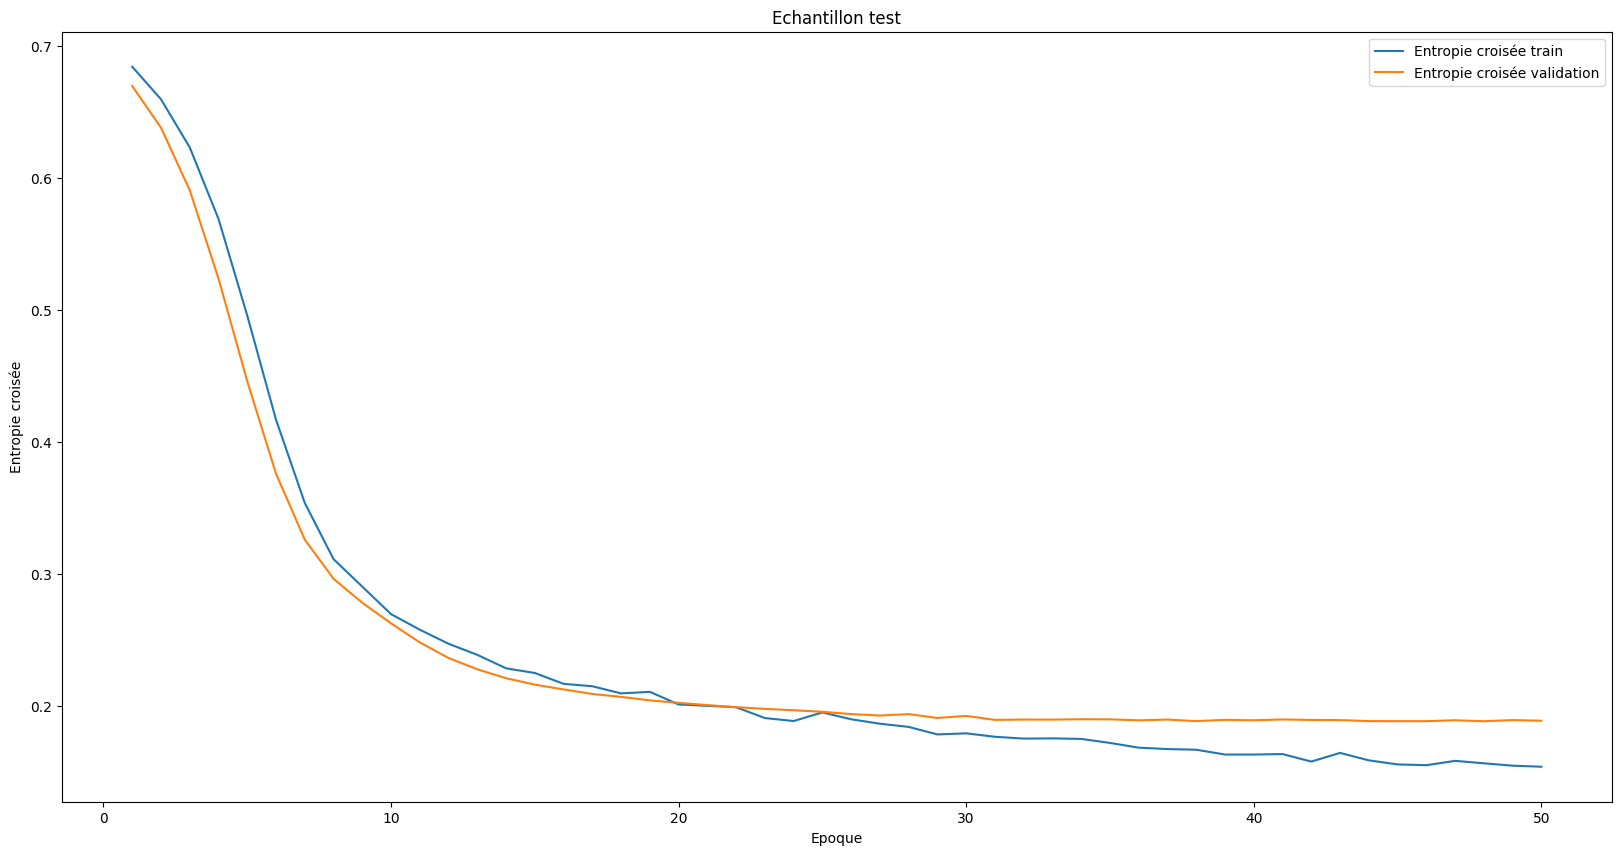

In [ ]:
figure = plt.gcf()
figure.set_size_inches((20, 10))
plt.title('Echantillon test')
plt.xlabel('Epoque')
plt.ylabel('Entropie croisée')
plt.plot(range(1, len(hist.history['loss']) + 1), hist.history['loss'])
plt.plot(range(1, len(hist.history['val_loss']) + 1), hist.history['val_loss'])
plt.legend(['Entropie croisée train', 'Entropie croisée validation'])
plt.show()

Le graphique ci-dessus permet de visualiser l'évolution de la fonction de perte pendant l'entrainement (en fonction des époques) sur les données d'entrainement et de valisation. On y remarque une évolution(dimunition) coordonnée de ces deux courbes qui suivent la même tendance.  On pourrait donc en conclure que l'apprentissage du modèle au fil du temps suit une bonne performance.

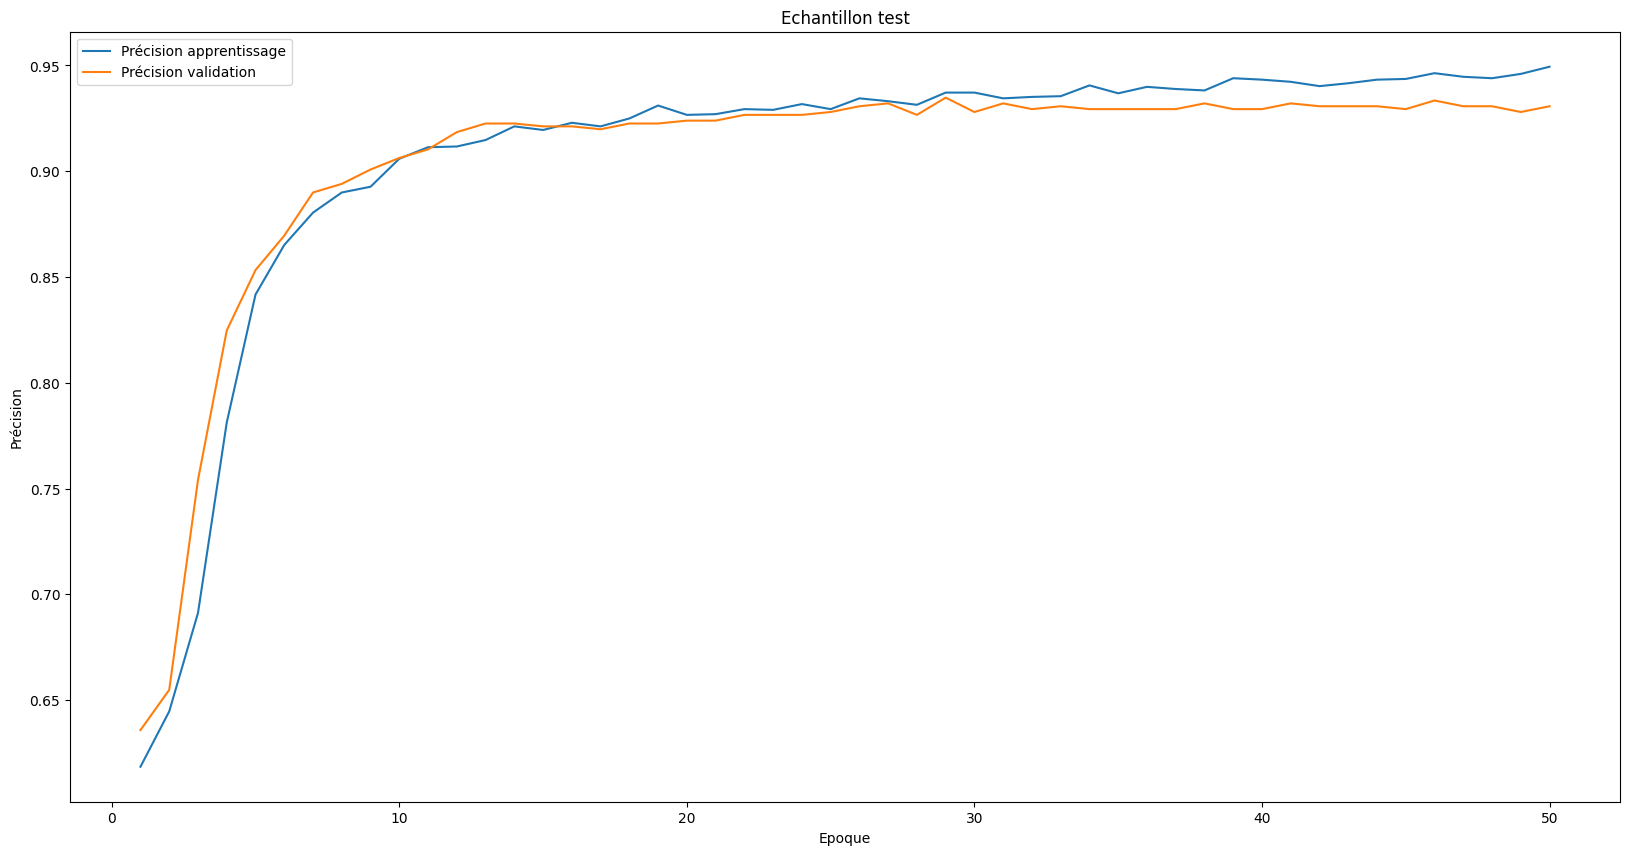

In [ ]:
figure = plt.gcf()
figure.set_size_inches((20, 10))
plt.title('Echantillon test')
plt.xlabel('Epoque')
plt.ylabel('Précision')
plt.plot(range(1, len(hist.history['accuracy']) + 1), hist.history['accuracy'])
plt.plot(range(1, len(hist.history['val_accuracy']) + 1), hist.history['val_accuracy'])
plt.legend(['Précision apprentissage', 'Précision validation'])
plt.show()

Le graphique ci-dessus permet de visualiser l'évolution de la précision au fil de l'entrainement sur les données d'apprentissage et de validation. Il permet de remarquer que la précision augmente au fil des époques avant de présenter une asymptote autour de 93% et que la performance sur les données de validation suit de près celle sur les données d'entraînement. Ce qui peut-être considéré comme une bonne performance en précision.

In [ ]:
y_sigmoid = model.predict(x_test)
print('Dimensions de y_sigmoid  :', y_sigmoid.shape)

29/29 [==============================] - 0s 2ms/step
Dimensions de y_sigmoid  : (921, 1)


In [ ]:
y_pred = np.argmax(y_sigmoid, axis=1)
#y_pred

In [ ]:
score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss     : {score[0]:4.4f}')
print(f'Test accuracy : {score[1]:4.4f}')

Test loss     : 0.1624
Test accuracy : 0.9381


Sur les données de test, notre modèle arrive à bien généraliser. Nous atteignons une précision de 93.81%.
Dans la suite, nous chercherons à améliorer néanmoins ce score en jouant sur le nombre de neurones par couche, sur le nombre d'époque, sur la taille des mini-lots et sur les paramètres d'activation et de désactivation des neurones par couche. Cette optimisation se fera grâce au module *keras-turner* . Commençons à l'installer et à importer les bibliothèques utiles.

In [26]:
!pip install keras-tuner -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 2.8 MB/s eta 0:00:00


In [33]:
import tensorflow as tf
import keras_tuner
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
from keras_tuner.tuners import RandomSearch

In [28]:
# Séparez les fonctionnalités (X) de la colonne cible (y)
x = data_spam.drop('spam', axis=1)  # Toutes les colonnes sauf la colonne cible
y = data_spam['spam']

# Normalisation des données
scaler = MinMaxScaler()
x_norm = scaler.fit_transform(x)

# Split de la donnée
x_train, x_val, y_train, y_val = train_test_split(x_norm, y, test_size=0.2, random_state=42)

Nous commençons par définir les valeurs possibles pour les hyperparamètres ainsi que la configuration de notre DNN. "RandomSearch" est utilisé pour une recherche aléatoire des hyperparamètres. Dans notre recherche, l'objectif est d'optimiser la précision sur les données de validation. La recherche effectuera au maximum 100 essais.

In [36]:
epoch = [50, 75, 100, 120, 150]
batch_sizes = [145, 160, 184, 203, 230, 232, 290, 320, 368, 406]

class SpamDetectionHyperModel(keras_tuner.HyperModel):
    def build(self, hp):
        model = keras.Sequential()

        # Input layer
        model.add(layers.InputLayer(input_shape=(57,)))

        # First hidden layer
        model.add(layers.Dense(
            units=hp.Int("units_1", min_value=100, max_value=250, step=50),
            activation="relu"
        ))
        model.add(layers.Dropout(rate=hp.Float("dropout_1", min_value=0.0, max_value=0.5, step=0.1)))

        # Second hidden layer
        model.add(layers.Dense(
            units=hp.Int("units_2", min_value=100, max_value=250, step=50),
            activation="relu"
        ))
        model.add(layers.Dropout(rate=hp.Float("dropout_2", min_value=0.0, max_value=0.5, step=0.1)))

        # Third hidden layer
        model.add(layers.Dense(
            units=hp.Int("units_3", min_value=100, max_value=250, step=50),
            activation="relu"
        ))
        model.add(layers.Dropout(rate=hp.Float("dropout_3", min_value=0.0, max_value=0.5, step=0.1)))

        # Output layer
        model.add(layers.Dense(1, activation="sigmoid"))

        model.compile(
            optimizer="adam",
            loss="binary_crossentropy",
            metrics=["accuracy"]
        )

        return model

    def fit(self, hp, model, x, y, validation_data=None, **kwargs):
        return model.fit(
            x,
            y,
            epochs=hp.Choice("epochs", values=epoch),
            batch_size=hp.Choice("batch_size", values=batch_sizes),
            validation_data=validation_data,
            **kwargs
        )

# Instantiate the tuner
tuner = RandomSearch(
    SpamDetectionHyperModel(),
    objective="val_accuracy",
    max_trials=100,
    overwrite=True,
    directory="my_dir",
    project_name="spam_detection_tuning"
)

# Define the callbacks outside the HyperModel class
callbacks_list = [
    callbacks.EarlyStopping(monitor='val_loss', patience=20),
    callbacks.ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True),
]

# Perform the hyperparameter search and pass the callbacks
tuner.search(x_train, y_train, validation_data=(x_val, y_val), callbacks=callbacks_list)

# Obtenez les meilleurs essais
best_trials = tuner.oracle.get_best_trials(num_trials=1)[0]

# Obtenez les meilleurs paramètres
best_params = best_trials.hyperparameters.values

# Affichez les meilleurs paramètres
print("Meilleurs paramètres trouvés :", best_params)



Trial 100 Complete [00h 00m 17s]
val_accuracy: 0.9619978070259094

Best val_accuracy So Far: 0.9674267172813416
Total elapsed time: 00h 30m 06s
Meilleurs paramètres trouvés : {'units_1': 250, 'dropout_1': 0.2, 'units_2': 250, 'dropout_2': 0.30000000000000004, 'units_3': 200, 'dropout_3': 0.1, 'epochs': 100, 'batch_size': 368}


La meilleur précision est obtenue après environs 30 minutes et correspond à 96.74% sur les données de validation. Sur les 100 essais, nous rechecherons donc celle qui fournit cette précision.

La configuration est celle d'un DNN à 3 couches avec 250 neurones sur la première, 250 sur la seconde et 200 sur la dernière. Le paramètre de dropout est respectivement de 0.2%, 0.3% et 0.1%. La taille des mini-lots est de 368 tandis que 100 époques sont utilisées.

In [37]:
#Meilleurs paramètres trouvés : {'units_1': 250, 'dropout_1': 0.2, 'units_2': 250, 'dropout_2': 0.30000000000000004, 'units_3': 200, 'dropout_3': 0.1, 'epochs': 100, 'batch_size': 368}


import pandas as pd
from sklearn.model_selection import train_test_split


# Séparez les fonctionnalités (X) de la colonne cible (y)
x = data_spam.drop('spam', axis=1)  # Toutes les colonnes sauf la colonne cible
y = data_spam['spam']

# Normalisation des données
scaler = MinMaxScaler()
x_norm = scaler.fit_transform(x)



# Utilisez train_test_split pour diviser les données
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.2, random_state=42)

print('Dimensions de x_train :', x_train.shape)
print('Dimensions de y_train :', y_train.shape)
print('Dimensions de x_test  :', x_test.shape)
print('Dimensions de y_test  :', y_test.shape)


model = keras.models.Sequential()

model.add(keras.layers.Input((57,1)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(250, activation='relu'))
model.add(keras.layers.Dropout(0.2))

model.add(keras.layers.Dense(250, activation='relu'))
model.add(keras.layers.Dropout(0.30000000000000004))

model.add(keras.layers.Dense(200, activation='relu'))
model.add(keras.layers.Dropout(0.1))

model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = 'adam',
              loss      = 'binary_crossentropy',
              metrics   = ['accuracy'])

callback = keras.callbacks.EarlyStopping(monitor              = 'val_loss',
                                         mode                 ='min',
                                         patience             = 20,
                                         restore_best_weights = True)

hist = model.fit(x_train,
                 y_train,
                 batch_size       = 368,
                 epochs           = 100,
                 verbose          = 1,
                 validation_split = 0.2,
                 callbacks        = [callback])

score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss     : {score[0]:4.4f}')
print(f'Test accuracy : {score[1]:4.4f}')

Dimensions de x_train : (3680, 57)
Dimensions de y_train : (3680,)
Dimensions de x_test  : (921, 57)
Dimensions de y_test  : (921,)
Epoch 1/100
8/8 [==============================] - 1s 43ms/step - loss: 0.6692 - accuracy: 0.6101 - val_loss: 0.6188 - val_accuracy: 0.6576
Epoch 2/100
8/8 [==============================] - 0s 21ms/step - loss: 0.5637 - accuracy: 0.7395 - val_loss: 0.4546 - val_accuracy: 0.8356
Epoch 3/100
8/8 [==============================] - 0s 21ms/step - loss: 0.3897 - accuracy: 0.8638 - val_loss: 0.3228 - val_accuracy: 0.8777
Epoch 4/100
8/8 [==============================] - 0s 20ms/step - loss: 0.2913 - accuracy: 0.8961 - val_loss: 0.2890 - val_accuracy: 0.9035
Epoch 5/100
8/8 [==============================] - 0s 22ms/step - loss: 0.2546 - accuracy: 0.9093 - val_loss: 0.2403 - val_accuracy: 0.9117
Epoch 6/100
8/8 [==============================] - 0s 20ms/step - loss: 0.2236 - accuracy: 0.9195 - val_loss: 0.2172 - val_accuracy: 0.9198
Epoch 7/100
8/8 [===========

En ré-entrainement un DNN, sur les données de test, on atteint une précision de 94.57% pour la configuration précédemment trouvée.

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Séparez les fonctionnalités (X) de la colonne cible (y)
x = data_spam.drop('spam', axis=1)  # Toutes les colonnes sauf la colonne cible
y = data_spam['spam']

# Normalisation des données
scaler = MinMaxScaler()
x_norm = scaler.fit_transform(x)



# Utilisez train_test_split pour diviser les données
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.2, random_state=42)

print('Dimensions de x_train :', x_train.shape)
print('Dimensions de y_train :', y_train.shape)
print('Dimensions de x_test  :', x_test.shape)
print('Dimensions de y_test  :', y_test.shape)

num_layer1 = 200
num_layer2 = 250

model = keras.models.Sequential()

model.add(keras.layers.Input((57,1)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(num_layer1, activation='relu'))
model.add(keras.layers.Dropout(0.1))

model.add(keras.layers.Dense(num_layer2, activation='relu'))
model.add(keras.layers.Dropout(0.0))

model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = 'adam',
              loss      = 'binary_crossentropy',
              metrics   = ['accuracy'])

callback = keras.callbacks.EarlyStopping(monitor              = 'val_loss',
                                         mode                 ='min',
                                         patience             = 20,
                                         restore_best_weights = True)

hist = model.fit(x_train,
                 y_train,
                 batch_size       = 184,
                 epochs           = 100,
                 verbose          = 1,
                 validation_split = 0.2,
                 callbacks        = [callback])

score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss     : {score[0]:4.4f}')
print(f'Test accuracy : {score[1]:4.4f}')

Dimensions de x_train : (3680, 57)
Dimensions de y_train : (3680,)
Dimensions de x_test  : (921, 57)
Dimensions de y_test  : (921,)
Epoch 1/100
16/16 [==============================] - 2s 36ms/step - loss: 0.6447 - accuracy: 0.6865 - val_loss: 0.5722 - val_accuracy: 0.7582
Epoch 2/100
16/16 [==============================] - 0s 15ms/step - loss: 0.4801 - accuracy: 0.8305 - val_loss: 0.3771 - val_accuracy: 0.8777
Epoch 3/100
16/16 [==============================] - 0s 13ms/step - loss: 0.3167 - accuracy: 0.8876 - val_loss: 0.2938 - val_accuracy: 0.9035
Epoch 4/100
16/16 [==============================] - 0s 13ms/step - loss: 0.2592 - accuracy: 0.9107 - val_loss: 0.2516 - val_accuracy: 0.9158
Epoch 5/100
16/16 [==============================] - 0s 14ms/step - loss: 0.2315 - accuracy: 0.9202 - val_loss: 0.2263 - val_accuracy: 0.9171
Epoch 6/100
16/16 [==============================] - 0s 13ms/step - loss: 0.2130 - accuracy: 0.9263 - val_loss: 0.2135 - val_accuracy: 0.9253
Epoch 7/100
16/1

En ré-entrainement un DNN, sur les données de test, on atteint une précision de 94.68% pour la configuration suivante.

- 2 couches
- 200 sur la première couche avec un dropout de 0.1%
- 250 sur la seconde couche avec un dropout de 0.0%
- 100 epochs
- 184 mini-lots

In [25]:
import pandas as pd
from sklearn.model_selection import train_test_split


# Séparez les fonctionnalités (X) de la colonne cible (y)
x = data_spam.drop('spam', axis=1)  # Toutes les colonnes sauf la colonne cible
y = data_spam['spam']

# Normalisation des données
scaler = MinMaxScaler()
x_norm = scaler.fit_transform(x)



# Utilisez train_test_split pour diviser les données
x_train, x_test, y_train, y_test = train_test_split(x_norm, y, test_size=0.2, random_state=42)

print('Dimensions de x_train :', x_train.shape)
print('Dimensions de y_train :', y_train.shape)
print('Dimensions de x_test  :', x_test.shape)
print('Dimensions de y_test  :', y_test.shape)

num_layer1 = 200
num_layer2 = 250

model = keras.models.Sequential()

model.add(keras.layers.Input((57,1)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(num_layer1, activation='relu'))
model.add(keras.layers.Dropout(0.1))

model.add(keras.layers.Dense(num_layer2, activation='relu'))
model.add(keras.layers.Dropout(0.1))

model.add(keras.layers.Dense(num_layer1, activation='relu'))
model.add(keras.layers.Dropout(0.1))

model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer = 'adam',
              loss      = 'binary_crossentropy',
              metrics   = ['accuracy'])

callback = keras.callbacks.EarlyStopping(monitor              = 'val_loss',
                                         mode                 ='min',
                                         patience             = 20,
                                         restore_best_weights = True)

hist = model.fit(x_train,
                 y_train,
                 batch_size       = 184,
                 epochs           = 100,
                 verbose          = 1,
                 validation_split = 0.2,
                 callbacks        = [callback])

score = model.evaluate(x_test, y_test, verbose=0)
print(f'Test loss     : {score[0]:4.4f}')
print(f'Test accuracy : {score[1]:4.4f}')

Dimensions de x_train : (3680, 57)
Dimensions de y_train : (3680,)
Dimensions de x_test  : (921, 57)
Dimensions de y_test  : (921,)
Epoch 1/100
16/16 [==============================] - 1s 23ms/step - loss: 0.6216 - accuracy: 0.6627 - val_loss: 0.4811 - val_accuracy: 0.8220
Epoch 2/100
16/16 [==============================] - 0s 11ms/step - loss: 0.3595 - accuracy: 0.8750 - val_loss: 0.3009 - val_accuracy: 0.8954
Epoch 3/100
16/16 [==============================] - 0s 9ms/step - loss: 0.2553 - accuracy: 0.9066 - val_loss: 0.2363 - val_accuracy: 0.9144
Epoch 4/100
16/16 [==============================] - 0s 9ms/step - loss: 0.2170 - accuracy: 0.9243 - val_loss: 0.2085 - val_accuracy: 0.9253
Epoch 5/100
16/16 [==============================] - 0s 10ms/step - loss: 0.1993 - accuracy: 0.9307 - val_loss: 0.1997 - val_accuracy: 0.9348
Epoch 6/100
16/16 [==============================] - 0s 10ms/step - loss: 0.1939 - accuracy: 0.9297 - val_loss: 0.1994 - val_accuracy: 0.9293
Epoch 7/100
16/16 

En ré-entrainement un DNN, sur les données de test, on atteint une précision de 95.01% pour la configuration suivante.

- 3 couches
- 200 sur la première couche avec un dropout de 0.1%
- 250 sur la deuxième couche avec un dropout de 0.1%
- 200 sur la troisième couche avec un dropout de 0.1%
- 100 epochs
- 184 mini-lots

Ces surprises permeetent surtout de conclure que les 100 explorations sont insuffisantes mais l'amélioration ne dépasse pas les 1% nous constatons.

Afin de challenger ce modèle, nous le comparerons à d'autres modèles de Machine Learning à commencer par une regression logistique simple. La section suivant détaille le développement de cet algorithme grâce à sklearn.

## Regression Logistique Spam

In [ ]:
data_spam.sample(5)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_semicolon,char_freq_leftbrac,char_freq_leftsquarebrac,char_freq_exclaim,char_freq_dollar,char_freq_pound,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
1285,0.31,0.20,0.72,0.0,0.00,0.62,0.00,0.62,0.62,0.93,...,0.000,0.000,0.000,0.548,0.199,0.033,14.283,685,1514,1
3850,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.895,0.179,0.358,0.000,0.000,0.000,1.712,13,149,0
801,0.07,0.22,0.82,0.0,0.52,0.00,0.07,0.00,0.67,0.59,...,0.000,0.095,0.000,0.119,0.071,0.167,3.429,74,974,1
3052,0.00,0.00,0.57,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.043,0.000,0.000,0.000,0.000,1.651,8,109,0
3176,0.21,0.00,0.42,0.0,2.54,0.00,0.00,0.00,0.00,0.00,...,0.028,0.115,0.000,0.000,0.000,0.000,2.457,45,258,0


In [ ]:
data_spam.shape

(4601, 58)

La première étape consiste à rendre numérique la variable cible conformément aux exigences de la regression logistique. Cela peut être fait grâce à la classe *LabelEncoder* de scikit-learn.

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data_spam['spam'] = le.fit_transform(data_spam['spam'])
data_spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_semicolon,char_freq_leftbrac,char_freq_leftsquarebrac,char_freq_exclaim,char_freq_dollar,char_freq_pound,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [5]:
x = data_spam.drop('spam', axis=1)  # Toutes les colonnes sauf la colonne cible
y = data_spam['spam']

Le code ci-dessous normalise les valeurs des caractéristiques dans la variable x en les ramenant à une plage spécifiée (par défaut, [0, 1]) à l'aide de la mise à l'échelle Min-Max. Cette opération est utile pour s'assurer que toutes les caractéristiques contribuent de manière égale à un modèle d'apprentissage automatique

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)

Nos séparons à présent les données en données de test et d'entrainement.

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x_scaled, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression(max_iter = 100, random_state = 0)
logistic_model.fit(X_train, Y_train)

logistic_test_score = logistic_model.score(X_test, Y_test)
print('Test set accuracy using Logistic Regression:', logistic_test_score * 100)

Test set accuracy using Logistic Regression: 88.70792616720955


Ce code ci-dessus utilise la bibliothèque scikit-learn en Python pour créer, entraîner et évaluer un modèle de régression logistique. Les paramètres spécifiés sont `max_iter` qui contrôle le nombre maximal d'itérations pour la convergence de l'optimisation, et `random_state` qui fixe la graine pour la reproductibilité des résultats. On affiche enfin le score d'accuracy du modèle sur l'ensemble de test en pourcentage. Ce score est de 88.71%.


Elle peut être considérée comme relativement bonne, mais il est toujours important de prendre en compte le contexte du problème et de comparer cette performance à d'autres métriques d'évaluation du modèle. Pour cela nous affichons la matrice de Confusion.

In [ ]:
#Link : https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_display_object_visualization.html#sphx-glr-auto-examples-miscellaneous-plot-display-object-visualization-py

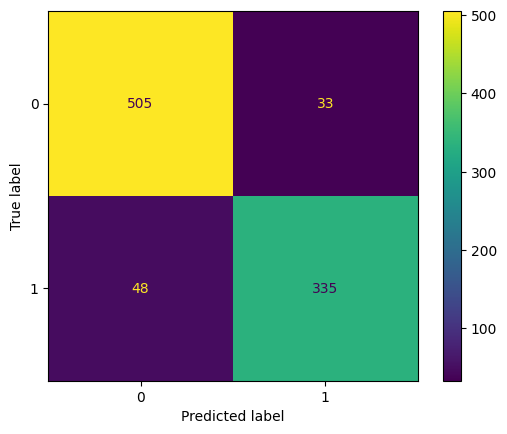

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_pred = logistic_model.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

- **Precision (Précision)** : Environ 91% des instances prédites comme positives (1) par le modèle sont réellement positives. Cela indique une faible proportion de faux positifs.

- **Recall (Rappel)** : Le modèle a réussi à capturer environ 87% des instances réellement positives. Cela indique une faible proportion de faux négatifs.

- **F1-Score** : C'est la moyenne harmonique entre la précision et le rappel. Il est utile pour évaluer l'équilibre entre la précision et le rappel.

- **Accuracy (Exactitude)** : Environ 89% de toutes les prédictions du modèle sont correctes. Cela peut être interprété comme une bonne performance globale.

En termes de prédiction des classes 0 et 1 :

- Le modèle a une bonne précision pour la classe 1, indiquant qu'il ne prédit pas cette classe à tort très fréquemment.
- Le modèle a un bon rappel pour la classe 1, indiquant qu'il identifie correctement une grande partie des instances de la classe 1.
- L'accuracy globale du modèle est également élevée.
- Le modèle a néanmoins de meilleures performances pour la classe 0. Cela peut s'expliquer par le déséquilibre des données en faveur de la classe 0

En résumé, le modèle semble bien performer pour les deux classes. Les métriques suggèrent une capacité du modèle à minimiser les faux positifs et les faux négatifs.

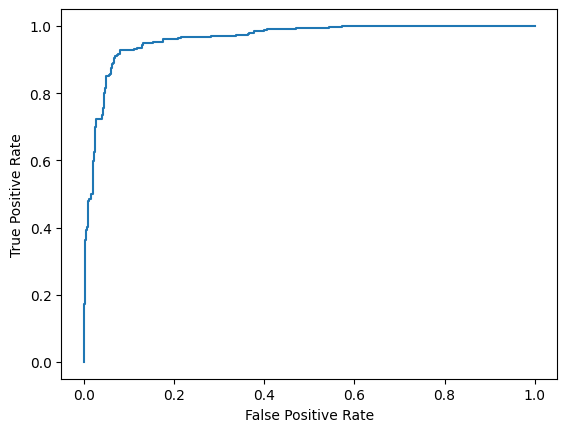

In [ ]:
from sklearn.metrics import RocCurveDisplay, roc_curve

y_score = logistic_model.decision_function(X_test)

fpr, tpr, _ = roc_curve(Y_test, y_score, pos_label=logistic_model.classes_[1])
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr).plot()

La courbe ROC compare le taux de faux positifs (FPR) au taux de vrais positifs (TPR). Bien que non parfaite, cette courbe ROC ci-dessus confirme les performances de bonne prédiction.

Comme dernière mesure du performance, nous affichons une courbe précision-rappel. Elle permet d'évaluer la performance du modèle de régression logistique sur l'ensemble de test, en se basant sur les scores de décision et les étiquettes réelles. Cette dernière plus bas confirme nos résultats précédents.

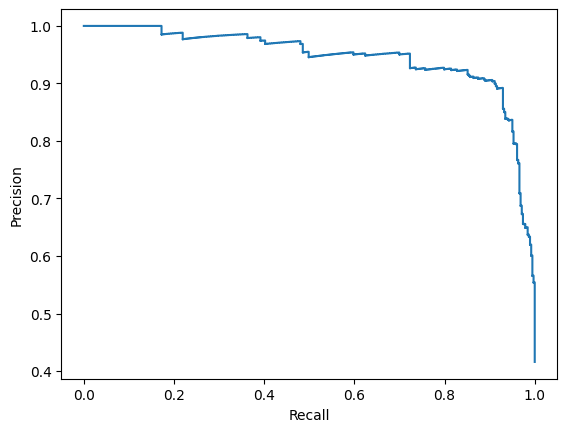

In [ ]:
from sklearn.metrics import PrecisionRecallDisplay, precision_recall_curve

prec, recall, _ = precision_recall_curve(Y_test, y_score, pos_label=logistic_model.classes_[1])
pr_display = PrecisionRecallDisplay(precision=prec, recall=recall).plot()

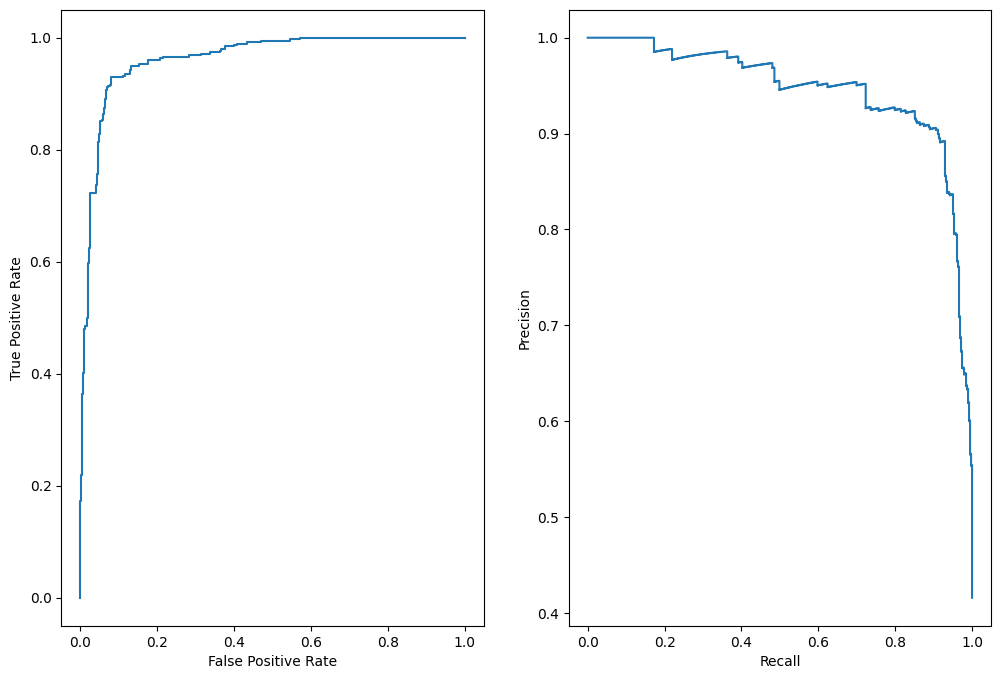

In [ ]:
import matplotlib.pyplot as plt

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

roc_display.plot(ax=ax1)
pr_display.plot(ax=ax2)
plt.show()

###Recherche aléatoire
La section suivante est basée sur cet exemple : https://scikit-learn.org/stable/auto_examples/compose/plot_column_transformer_mixed_types.html#sphx-glr-auto-examples-compose-plot-column-transformer-mixed-types-py

Dans cet exemple, nous ferons une recherche aussi des meilleurs paramètres pour notre modèle de regression logistique. Nous définissons l'architecture pour un premier entrainement. Ensuite, nous définissons un éventail de paramètres parmi lesquels une recherche aléatoire de meilleurs paramètres sera faite.

In [8]:
import numpy as np

from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.feature_selection import SelectPercentile, chi2
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler

np.random.seed(0)

In [9]:
# Obtenez la liste des noms de colonnes
liste_noms_colonnes = data_spam.columns.tolist()

# Supprimez la colonne nommée 'Spam'
colonne_a_supprimer = 'spam'
if colonne_a_supprimer in liste_noms_colonnes:
    liste_noms_colonnes.remove(colonne_a_supprimer)

# Affichez la liste mise à jour
print(liste_noms_colonnes)

['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d', 'word_freq_our', 'word_freq_over', 'word_freq_remove', 'word_freq_internet', 'word_freq_order', 'word_freq_mail', 'word_freq_receive', 'word_freq_will', 'word_freq_people', 'word_freq_report', 'word_freq_addresses', 'word_freq_free', 'word_freq_business', 'word_freq_email', 'word_freq_you', 'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000', 'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george', 'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet', 'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85', 'word_freq_technology', 'word_freq_1999', 'word_freq_parts', 'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting', 'word_freq_original', 'word_freq_project', 'word_freq_re', 'word_freq_edu', 'word_freq_table', 'word_freq_conference', 'char_freq_semicolon', 'char_freq_leftbrac', 'char_freq_leftsquarebrac', 'char_freq_exclaim', 'ch

In [10]:
numeric_features = liste_noms_colonnes
numeric_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

categorical_features = []
categorical_transformer = Pipeline(
    steps=[
        ("encoder", OneHotEncoder(handle_unknown="ignore")),
        ("selector", SelectPercentile(chi2, percentile=50)),
    ]
)
preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

In [11]:
clf = Pipeline(
    steps=[("preprocessor", preprocessor), ("classifier", LogisticRegression())]
)

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)


Les paramètres définis dans le dictionnaire `param_grid` sont utilisés pour spécifier les différentes valeurs d'hyperparamètres à explorer lors de la recherche aléatoire d'hyperparamètres à l'aide de `RandomizedSearchCV`. Voici une explication détaillée des paramètres :

1. `"preprocessor__num__imputer__strategy": ["mean", "median"]` :
   - `preprocessor__num__imputer__strategy`: Cela spécifie la stratégie utilisée dans la transformation des caractéristiques numériques. Il s'agit de la stratégie de remplissage des valeurs manquantes.
   - Les valeurs à explorer sont "mean" (moyenne) et "median" (médiane). Cela permet d'évaluer la performance du modèle en utilisant différentes stratégies de remplissage des valeurs manquantes pour les caractéristiques numériques.

2. `"preprocessor__cat__selector__percentile": [10, 30, 50, 70]` :
   - `preprocessor__cat__selector__percentile`: Cela spécifie la stratégie pour la transformation des caractéristiques catégorielles.
   - Les valeurs à explorer sont 10, 30, 50 et 70. Ce paramètre contrôle le pourcentage de caractéristiques catégorielles les plus importantes à conserver lors de la sélection des caractéristiques.

3. `"classifier__C": [0.1, 1.0, 10, 100]` :
   - `classifier__C`: Cela spécifie le paramètre `C` de l'objet `LogisticRegression` utilisé dans le modèle de classification.
   - Les valeurs à explorer sont 0.1, 1.0, 10, et 100. Le paramètre `C` est l'inverse de la force de régularisation dans la régression logistique. Des valeurs plus élevées de `C` correspondent à une régularisation plus faible. Cela permet d'évaluer comment la performance du modèle varie en fonction du paramètre de régularisation.

En résumé, le paramètre `param_grid` spécifie différentes combinaisons d'hyperparamètres à tester lors de la recherche aléatoire pour trouver la combinaison qui optimise les performances du modèle sur les données d'entraînement. Cela permet d'explorer différentes stratégies de prétraitement et des paramètres de modèle pour identifier ceux qui fonctionnent le mieux pour la tâche de classification spécifique.

In [18]:
param_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "preprocessor__cat__selector__percentile": [10, 30, 50, 70],
    "classifier__C": [0.1, 1.0, 10, 100],
}

search_cv = RandomizedSearchCV(clf, param_grid, n_iter=200, random_state=0)
search_cv

RandomizedSearchCV(estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('scaler',
                                                                                                StandardScaler())]),
                                                                               ['word_freq_make',
                                                                                'word_freq_address',
                                                                                'word_freq_all',
                                                                                'word_freq_3d',
                                                                                'word_freq_our',
                                                                                'word_freq_over',
                                                                                'word_freq_remove',
                                                                                'word_freq_internet',
                                                                                'word_freq_order'...
                                                                                                OneHotEncoder(handle_unknown='ignore')),
                                                                                               ('selector',
                                                                                                SelectPercentile(percentile=50,
                                                                                                                 score_func=<function chi2 at 0x7f6ca1d67370>))]),
                                                                               [])])),
                                             ('classifier',
                                              LogisticRegression())]),
                   n_iter=200,
                   param_distributions={'classifier__C': [0.1, 1.0, 10, 100],
                                        'preprocessor__cat__selector__percentile': [10,
                                                                                    30,
                                                                                    50,
                                                                                    70],
                                        'preprocessor__num__imputer__strategy': ['mean',
                                                                                 'median']},
                   random_state=0)

In [19]:
search_cv.fit(X_train, Y_train)

print("Best params:")
print(search_cv.best_params_)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:305: UserWarning: The total space of parameters 32 is smaller than n_iter=200. Running 32 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as show

Best params:
{'preprocessor__num__imputer__strategy': 'mean', 'preprocessor__cat__selector__percentile': 10, 'classifier__C': 100}


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

In [14]:
print(f"Internal CV score: {search_cv.best_score_:.3f}")

Internal CV score: 0.930


Les meilleurs paramètres trouvés sont :
- 'preprocessor__num__imputer__strategy': 'mean'
- 'preprocessor__cat__selector__percentile': 10
- 'classifier__C': 100
Et le score de cross validation associé à celui-ci est de 93%.

In [22]:
import pandas as pd

cv_results = pd.DataFrame(search_cv.cv_results_)
cv_results = cv_results.sort_values("mean_test_score")
cv_results[
    [
        "mean_test_score",
        "std_test_score",
        "param_preprocessor__num__imputer__strategy",
        "param_preprocessor__cat__selector__percentile",
        "param_classifier__C",
    ]
].head(5)

,mean_test_score,std_test_score,param_preprocessor__num__imputer__strategy,param_preprocessor__cat__selector__percentile,param_classifier__C
0,0.918207,0.006161,mean,10,0.1
1,0.918207,0.006161,median,10,0.1
2,0.918207,0.006161,mean,30,0.1
3,0.918207,0.006161,median,30,0.1
4,0.918207,0.006161,mean,50,0.1


Le tableau présente les cinq premiers résultats(les plus faibles) de la recherche des meilleures hyperparamètres en fonction du score moyen de test. Ceci est utile pour avoir une idée des configurations d'hyperparamètres qui ont donné les meilleurs résultats et les pires lors de la recherche.

In [ ]:
print(
    "accuracy of the best model from randomized search: "
    f"{search_cv.score(X_test, Y_test):.3f}"
)

accuracy of the best model from randomized search: 0.908


Cette optimisation nous fait passer ainsi d'une accuracy de 88.71% à 90.8% sur les données de test.

Les performances du modèle de regression logistique sont relativement bonnes. Malgré sa simplicité, le modèle arrive toutefois à atteindre de bonnes performances en apprentissage et surtout généraliser sur les données non connues. Ces performances n'atteignent toutefois pas celles du modèle de deep learning premièrement développé. Nous allons continuer notre exploration et ainsi nous attaquer à un modèle de random forest dans la suite.

## Random Forest

Les Random Forest sont pratique du fait de leur polyvalence, leur capacité à gérer des données complexes, leur robustesse et leur aptitude à fournir des performances élevées dans une variété de scénarios. Dans cette section nous en déployerons un sur les données de spam dans le but de faire un meilleur apprentissage des relations entre les variables explicatives et notre variable cible. Ainsi nous pourrons atteindre de meilleures performances. Nous importerons le modèle de puis scikit learn.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import plot_roc_curve
from sklearn.model_selection import cross_val_score

from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC

In [ ]:
x = data_spam.drop('spam', axis=1)  # Toutes les colonnes sauf la colonne cible
y = data_spam['spam']

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

Comme précedemment, 80% des données serviront à l'entrainement et 20% pour le test. Sur cette base, nous déployons un premier modèle en utilisant 50 arbres pour l'agrégation.

In [ ]:
rfc = RandomForestClassifier(random_state=42, min_samples_split=2, n_estimators=50)
rfc.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=50, random_state=42)

In [ ]:
print(f"Baseline accuracy on test data: {rfc.score(X_test, Y_test):.4}")

Baseline accuracy on test data: 0.9446


Le résultats est plutôt remarquable car nous atteignons une précision de 94.46%. Cette dernière est très bonne et nous permet d'atteigne systématiquement les performances obtenues précedemment avec le DNN en ré-entrainement.

In [ ]:
scores = cross_val_score(rfc, x, y, cv=6)
scores.mean()

0.9358608415230977

Le score de cross validation quant à lui est par contre à 93.57%. Ce qui est aussi remarquable.

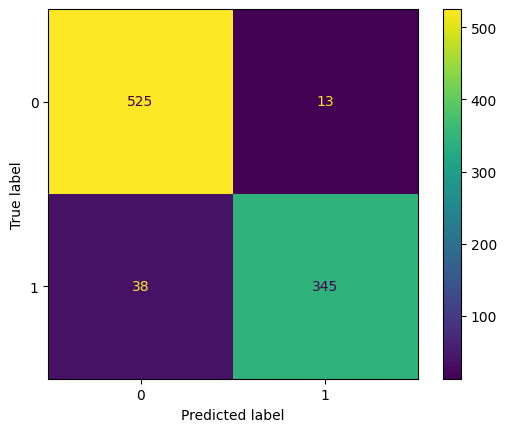

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_pred = rfc.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

Comparativement au modèle de la regression logistique, nous prédisons mieux les mails spam (une amélioration de +10 sur le même nombre). Il en va de même pour non spam (amélioration de +20). Cela correspond à un gain de +5.81% en précision et de +3.51% en exactitude environs.

Comme précédemment, nous essaierons d'optimiser les paramètres cependant à l'aide de la validation croisée afin d'avoir le meilleur modèle possible.

On définit une grille de paramètres à explorer.

- Dans ce cas, on recherche les meilleurs hyperparamètres parmi différentes valeurs pour le nombre d'estimateurs (n_estimators), le nombre minimum d'échantillons requis pour diviser un nœud (min_samples_split), et la graine de génération de nombres aléatoires (random_state).

- Le nombre de partitions pour la validation croisée (cv=5 indique une validation croisée à 5 plis), la métrique de performance à optimiser (scoring='accuracy' pour l'exactitude).


In [ ]:
from sklearn.model_selection import GridSearchCV


# Créer un RandomForestClassifier
rf_classifier = RandomForestClassifier()

# Définir la grille de paramètres à rechercher
param_grid = {
    'n_estimators': [10, 25, 50, 100],
    'min_samples_split': [2, 5, 10],
    'random_state': [0, 42]
}

# Créer un objet GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Effectuer la recherche de paramètres sur les données d'entraînement
grid_search.fit(X_train, Y_train)

# Afficher les meilleurs paramètres trouvés
print("Meilleurs paramètres:", grid_search.best_params_)

# Évaluer la performance du modèle sur les données de test
accuracy = grid_search.best_estimator_.score(X_test, Y_test)
print("Précision sur les données de test:", accuracy)

Meilleurs paramètres: {'min_samples_split': 2, 'n_estimators': 100, 'random_state': 42}
Précision sur les données de test: 0.9457111834961998


Les meilleurs paramètres sont donc :   

1.   min_samples_split: 2
2.   n_estimators: 100
3.   random_state : 42

Une précision est calculée sur les données de test après la validation croisée. On obtient un performance de 94.57%. Une légère amélioration par rapport aux 50 arbres.


## Comparaison rapide entre random forest et SVM - SVC avec la courbe ROC

Par ailleurs, la courbe ROC du random forest ci-dessous en orange (AUC = 0.99) témoigne de sa très bonne performance. En comparaison avec une SVM dont la courbe ROC est aussi déssinée ci-dessous en bleu (AUC = 0.81), il performe beaucoup mieux. Nous nous abstenons donc d'implémenter en dure forme une SVM.

Text(0.5, 0.98, 'ROC curve comparison')

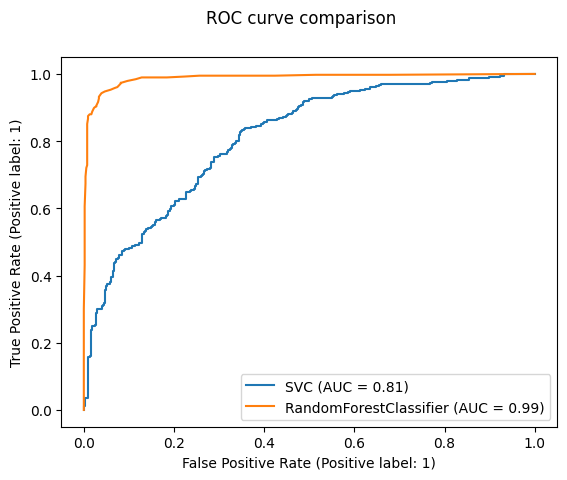

In [ ]:
# Comparaison avec une SVM
svc = SVC(random_state=42)
svc.fit(X_train, Y_train)


svc_disp = RocCurveDisplay.from_estimator(svc, X_test, Y_test)
rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, Y_test, ax=svc_disp.ax_)
rfc_disp.figure_.suptitle("ROC curve comparison")

## Gradient Boosting

Nous partirons plutôt sur une technique d'ensemble séquentielle. Cette dernière pourrait nous offrir une adaptabilité aux erreurs, une potentialité de performances supérieures au Random Forest. Comme pour le Random Forest, nous implémentons notre Gradient Boosting depuis scikit learn. Dans l'espoir d'avoir un meilleur modèle.

In [11]:
# Séparez les fonctionnalités (X) de la colonne cible (y)
x = data_spam.drop('spam', axis=1)  # Toutes les colonnes sauf la colonne cible
y = data_spam['spam']

# Normalisation des données
scaler = MinMaxScaler()
x_norm = scaler.fit_transform(x)

# Utilisez train_test_split pour diviser les données
X_train, X_test, Y_train, Y_test = train_test_split(x_norm, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.ensemble import HistGradientBoostingClassifier


hgbc = HistGradientBoostingClassifier(max_iter=100).fit(X_train, Y_train)
hgbc.score(X_test, Y_test)

0.9619978284473398

Avec 100 itérations pour arriver au choix du modèle, nous atteignons une performance de 96.20% environs. Ce qui est bien meilleur que tous les modèles précédents. Aussi nous nous dispenserons d'une recherche de meilleurs paramètres. En effet, sur la base des valeurs choisies et du résultat précédent, il performera mieux que tous les autres. Voyons plus en détail les performances.

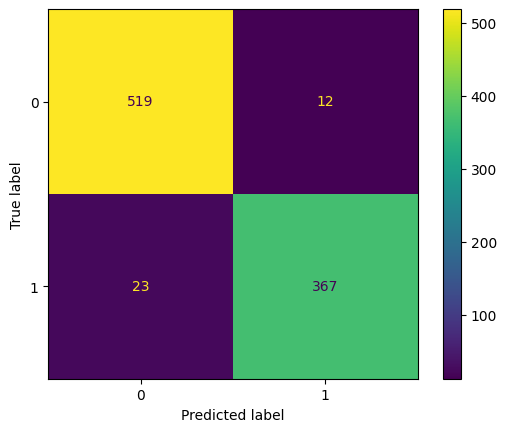

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

y_pred = hgbc.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)

cm_display = ConfusionMatrixDisplay(cm).plot()

Le modèle de gradient boosting montre une amélioration remarquable sur le label "1" (positif) avec moins de faux négatifs (FN) et plus de vrais positifs (TP) par rapport de random forest. Cependant, il montre une légère régression sur le label "0" (négatif) avec moins de vrais négatifs (TN). La progression ou la régression dépend du contexte spécifique de la tâche et des objectifs du modèle. En se plaçant dans un contexte où l'on a plus d'intérêt à ne pas rater les spams, le gradient boosting s'avère plus efficace.


Il montre une amélioration d'environ 0.68% en précision par rapport au random forest et  une amélioration d'environ 1.9% en exactitude par rapport à ce dernier.

Text(0.5, 0.98, 'ROC curve comparison')

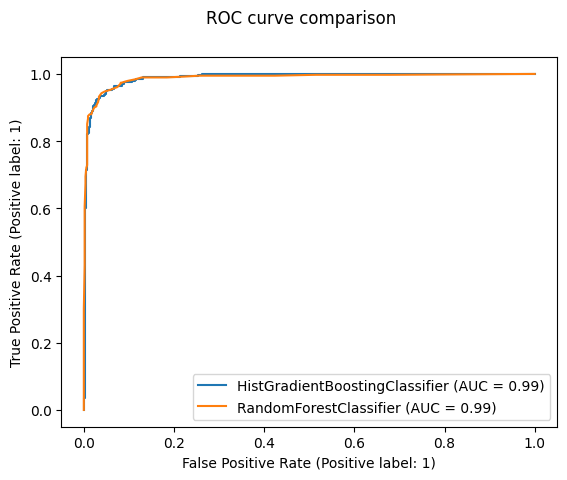

In [ ]:
svc_disp = RocCurveDisplay.from_estimator(hgbc, X_test, Y_test)
rfc_disp = RocCurveDisplay.from_estimator(rfc, X_test, Y_test, ax=svc_disp.ax_)
rfc_disp.figure_.suptitle("ROC curve comparison")

Enfin, la courbe ROC des deux modèles qui montre qu'elle ne sont pas très éloignées en performance cependant.

Dans le cadre de ce travail pratique sur la détection de spam, nous avons exploré plusieurs modèles de machine learning, notamment un Deep Neural Network (DNN), une régression logistique, un Random Forest et un Gradient Boosting. L'objectif était de comparer les performances de ces modèles et de déterminer celui qui offre la meilleure précision dans la détection des spams.

Les résultats obtenus ont révélé que le Gradient Boosting a surperformé les autres modèles, se positionnant en tant que modèle le plus performant pour la détection de spam. Sa capacité à capturer des relations complexes dans les données a contribué à une amélioration significative des performances par rapport aux autres modèles. Le Random Forest a également démontré des performances robustes, le plaçant en deuxième position. Le DNN et le Random Forest ont montré des performances comparables, bien qu'ils soient légèrement inférieurs au Gradient Boosting. Vient en dernier la regression logistique avec ses remarquables 90% environ.

Cependant, au-delà des performances des modèles, la recherche des meilleurs paramètres a présenté des défis, en particulier en raison du grand nombre de variables dans le jeu de données. L'optimisation des hyperparamètres pour chaque modèle a demandé du temps et des ressources. La complexité des modèles, en particulier du DNN, a nécessité une recherche minutieuse pour éviter le surajustement et garantir une généralisation efficace.

Par ailleurs, la gestion du grand nombre de variables dans le jeu de données a également été un défi. La sélection des caractéristiques aurait pu être une étape cruciale pour améliorer l'efficacité des modèles. Certaines variables peuvent ne pas contribuer de manière significative à la prédiction du spam et auraient pu être éliminées pour simplifier le modèle et accélérer l'entraînement.

En conclusion, bien que le Gradient Boosting se soit avéré être le modèle de choix pour la détection de spam dans cette étude, il est important de noter les défis liés à la recherche des meilleurs paramètres et à la gestion des variables. Des étapes supplémentaires telles que la sélection de caractéristiques auraient pu être explorées pour optimiser davantage les modèles. Ce travail fournit des perspectives intéressantes pour des améliorations futures, notamment l'exploration de techniques avancées de Deep Learning et des méthodes plus sophistiquées de gestion des caractéristiques.